In [60]:
import pandas as pd
import json
import requests
import warnings
import geopandas as gpd
import matplotlib.pyplot as plt
import itables
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from dash import Dash, html, dcc, Input, Output, callback
warnings.filterwarnings('ignore')

In [108]:
##kod do pobrania danych lokalizacyjnych (wartość filtered_df1 zmieniana kilkukrotnie na kolejne rekordy z uwagi na czas wykonania)

# ścieżka_do_pliku_excel = 'C:/Users/Igor/Desktop/ML/Projekt_1/who_aap_2021_v9_11august2022.xlsx'
# nazwa_arkusza = 'AAP_2022_city_v9'
# df = pd.read_excel(ścieżka_do_pliku_excel, sheet_name=nazwa_arkusza)
# df

#  filtered_df1 = df.head(500)

# warnings.filterwarnings('ignore')

# def get_city_info(city):
#     api_url = 'https://api.api-ninjas.com/v1/geocoding?city={}'.format(city)
#     response = requests.get(api_url, headers={'X-Api-Key': 'EUR2kMkpY42iJa+4WWFKIw==QgTELYWvXJM2VeEy'})
#     if response.status_code == requests.codes.ok:
#         return json.loads(response.text)
#     else:
#         return []
    
# filtered_df1.loc[:,'City Info'] = filtered_df1['City or Locality'].apply(get_city_info)

# filtered_df1 

# for coords in filtered_df1['City Info']:
#     filtered_df1['Latitude'] = filtered_df1['City Info'].apply(lambda x: x[0]['latitude'] if x else None)
#     filtered_df1['Longitude'] = filtered_df1['City Info'].apply(lambda x: x[0]['longitude'] if x else None)

# filtered_df1

##suma wszystkich filtered_df została zapisana do pliku excel (data_coords.xlsx)

In [61]:
df_coords = pd.read_excel('C:/Users/Igor/Desktop/ML/Projekt_1/data_coords.xlsx')

In [62]:
itables.show(df_coords, show_index=False)

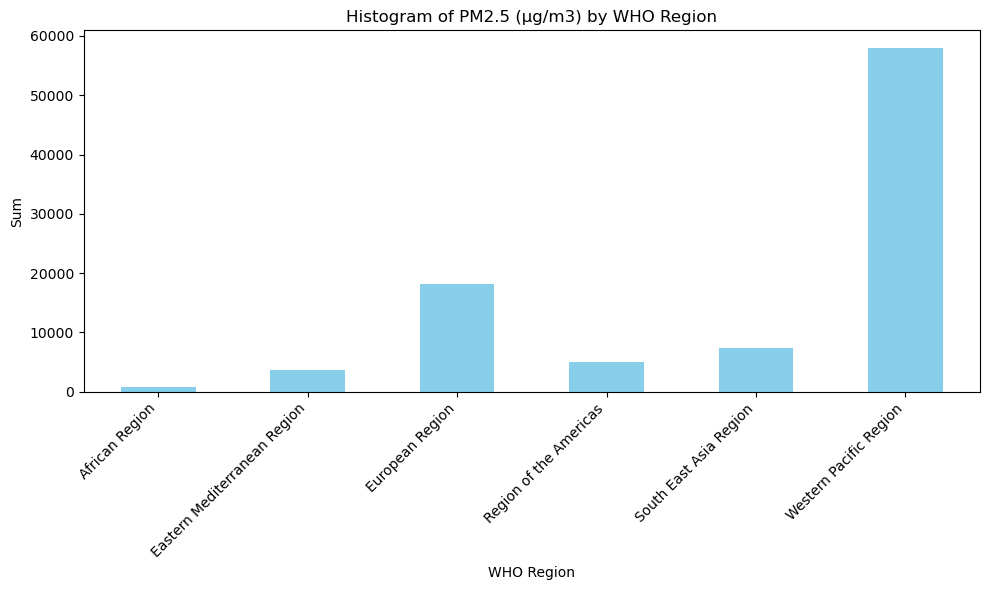

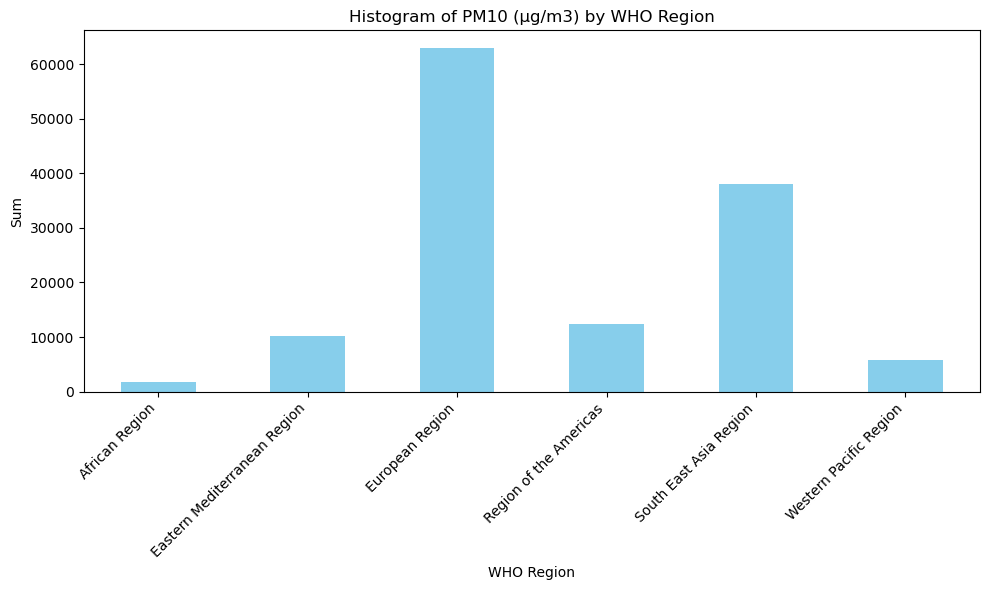

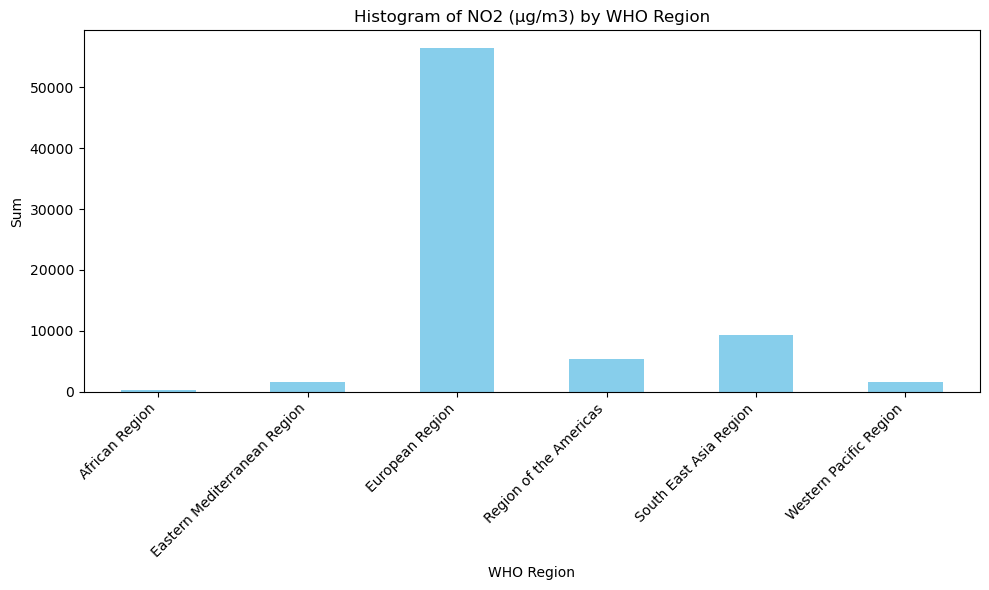

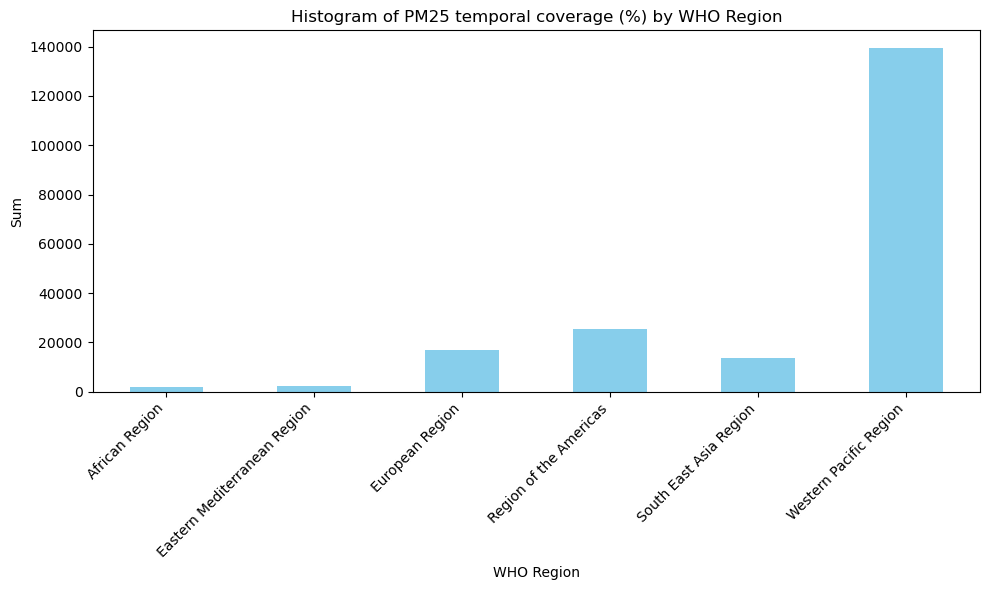

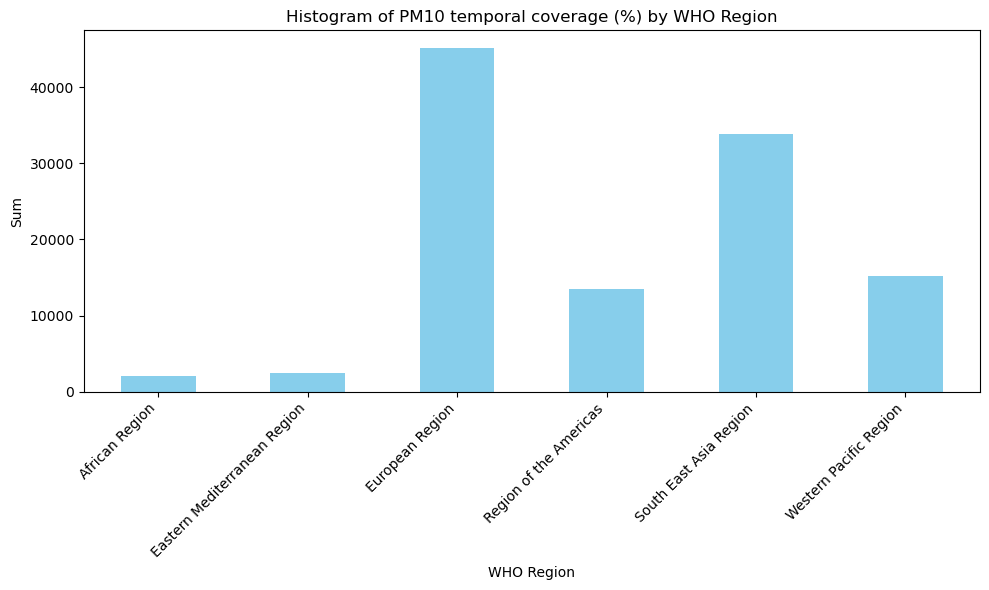

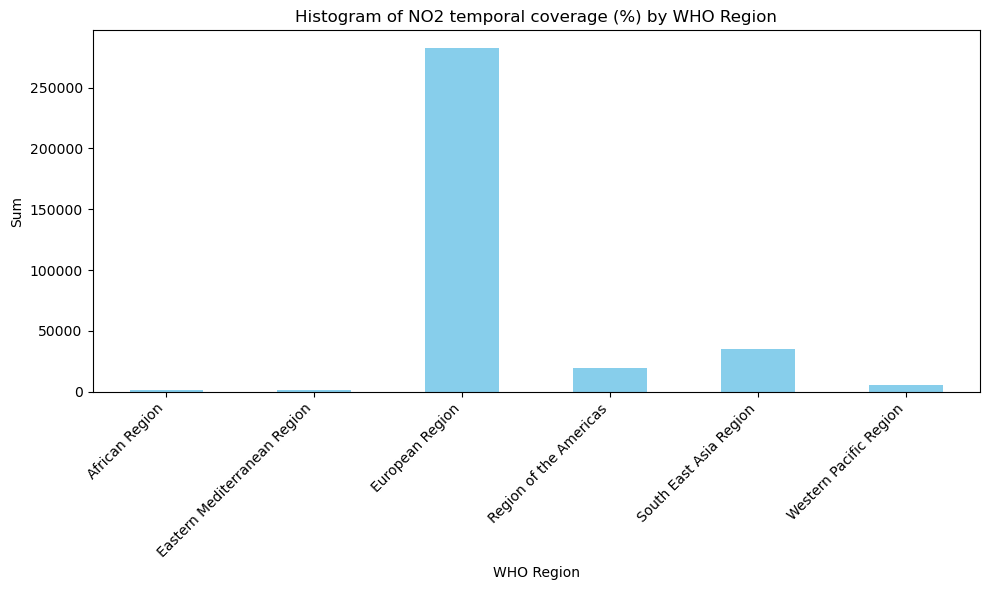

In [63]:

grouped_data = df_coords.groupby('WHO Region').sum()


variables = ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)', 'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)']


for variable in variables:
    plt.figure(figsize=(10, 6))
    grouped_data[variable].plot(kind='bar', color='skyblue')
    plt.title(f'Histogram of {variable} by WHO Region')
    plt.xlabel('WHO Region')
    plt.ylabel('Sum')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

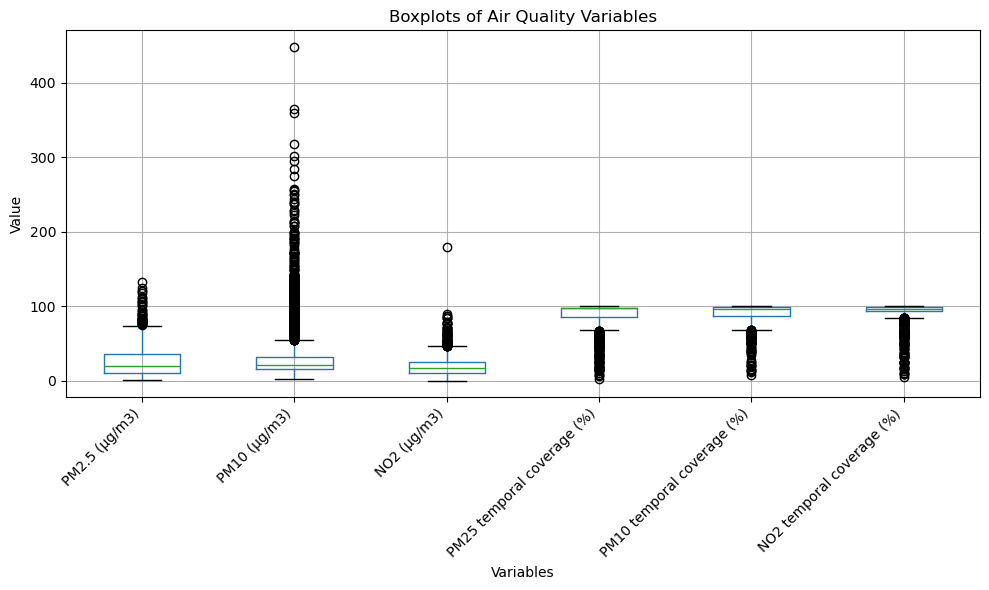

In [64]:
variables = ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)', 'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)']

plt.figure(figsize=(10, 6))
df_coords[variables].boxplot()
plt.title('Boxplots of Air Quality Variables')
plt.ylabel('Value')
plt.xlabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


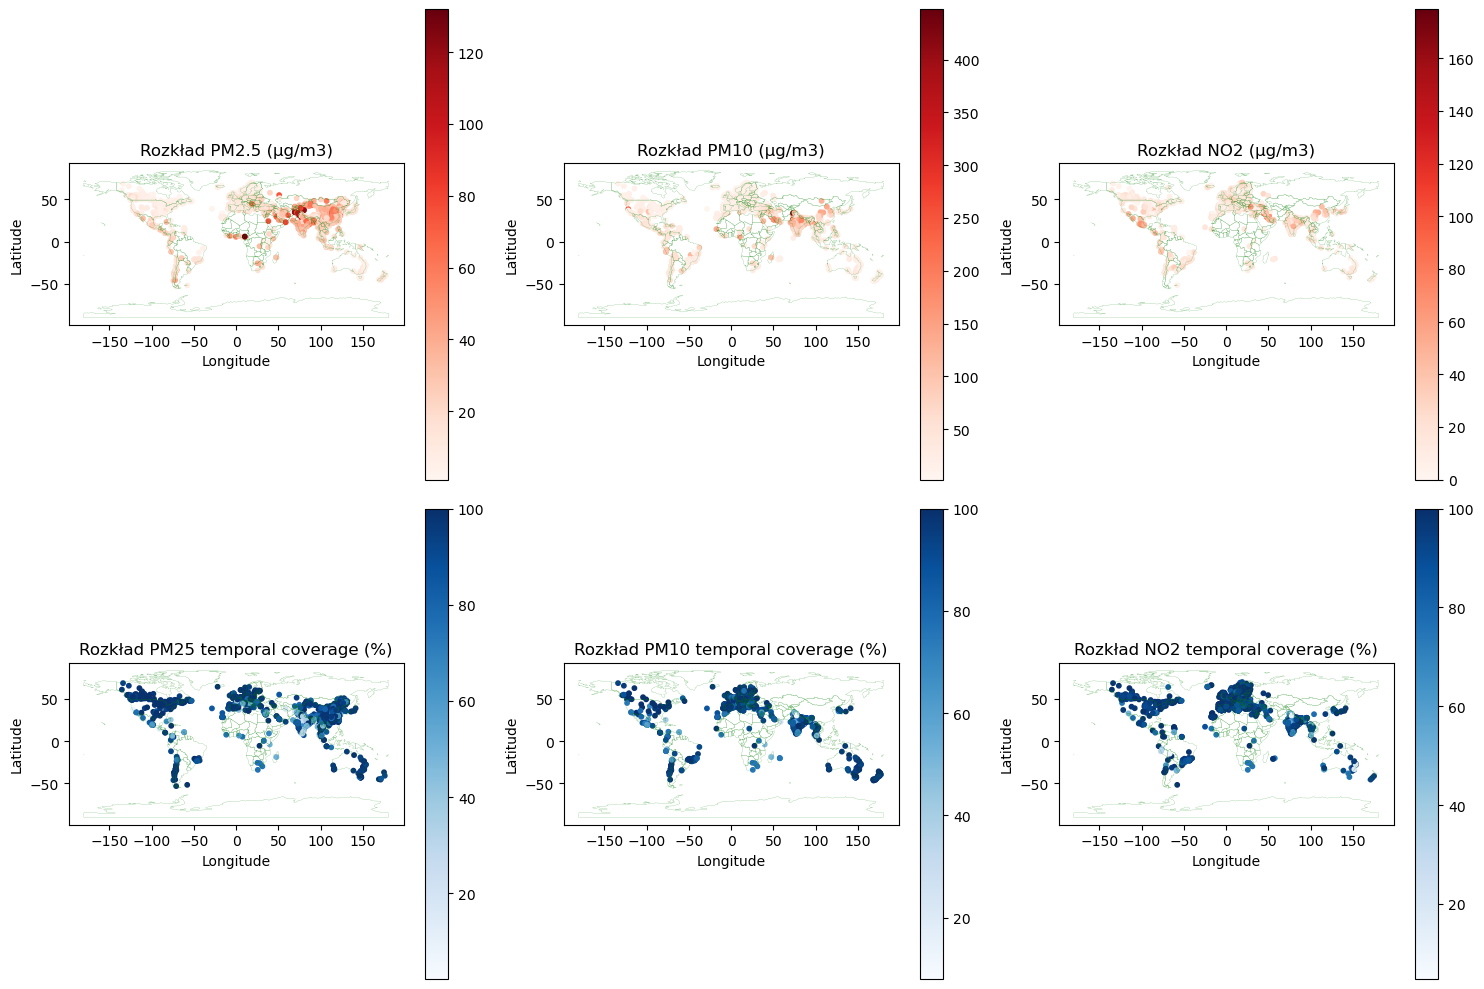

In [65]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"), engine="pyogrio")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, variable in enumerate(variables):
    ax = axes[i]
    
    geometry = gpd.points_from_xy(df_coords['Longitude'], df_coords['Latitude'])
    
    gdf = gpd.GeoDataFrame(df_coords, geometry=geometry)
    
    cmap = 'Reds' if 'coverage' not in variable else 'Blues'
    gdf.plot(ax=ax, column=variable, cmap=cmap, legend=True, markersize=10)
    
    world.boundary.plot(ax=ax, linewidth=0.1, color="green")
    
    ax.set_title(f'Rozkład {variable}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()

Powyżej znajdują się dne dla całego świata, gdzie zostały wybrane po jednym rekordzie dla miasta (ograniczone do najwyższego roku badania dla tego miasta). Można zaobserwować, że dla danych z całego świata największe skupienie czujników występuje w miejscach silnie zaludnionych. Ponadto największa suma procent pokrycia czasowego występuje w Europie (w każdym przypadku), co znajduje swoje odzwierciedlenie na mapach. Najsilniej odstające wartości zachodzą dla zmiennej PM10.

In [66]:
df_coords_eur = df_coords[df_coords["WHO Region"] == "European Region"]

itables.show(df_coords_eur, show_index=False)

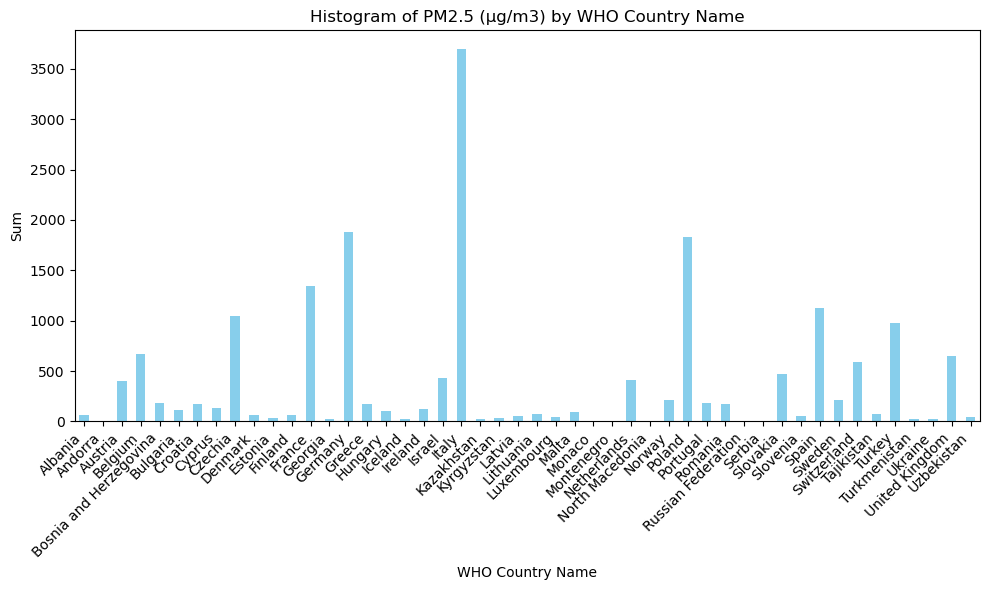

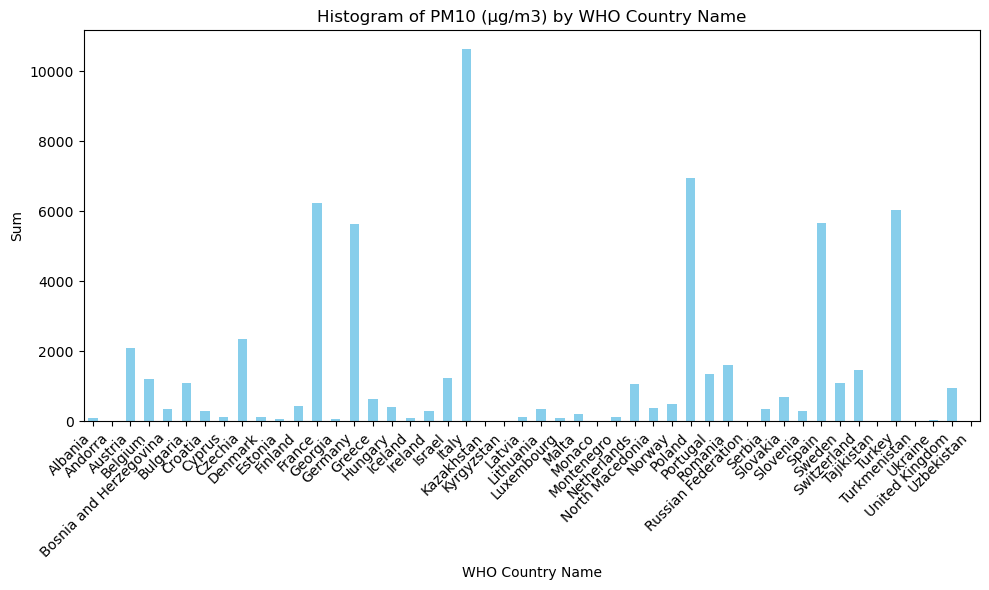

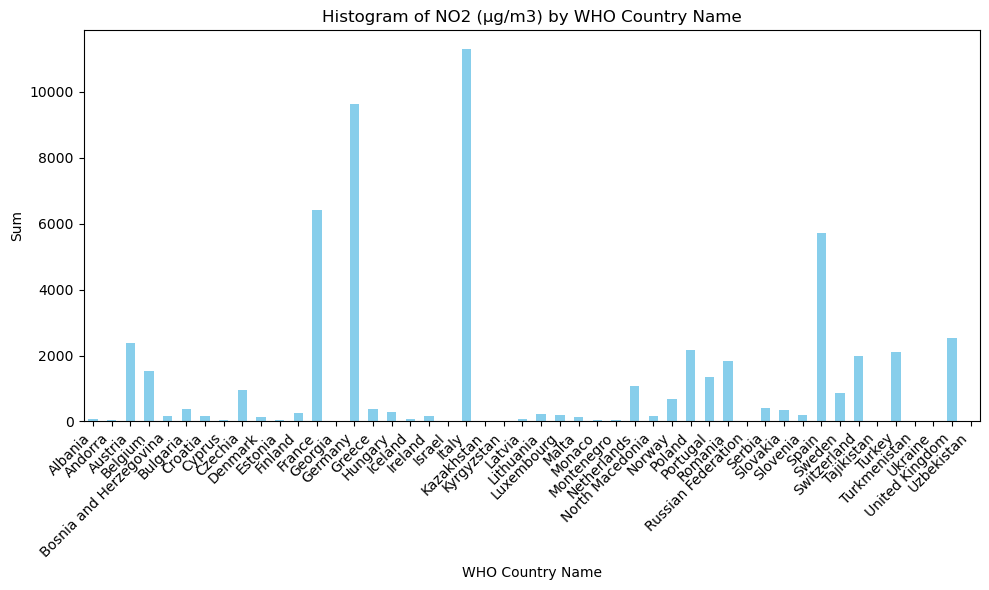

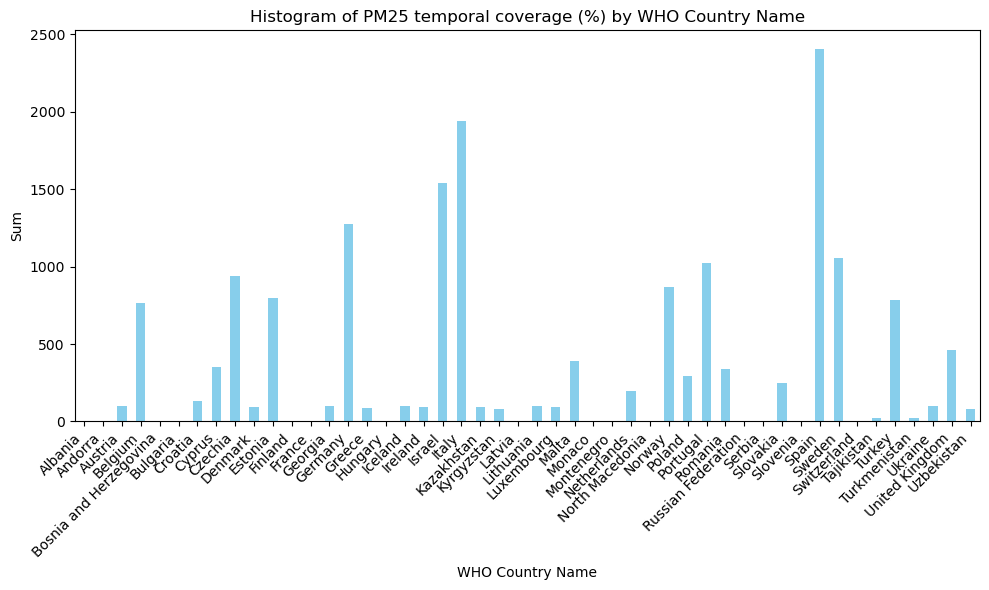

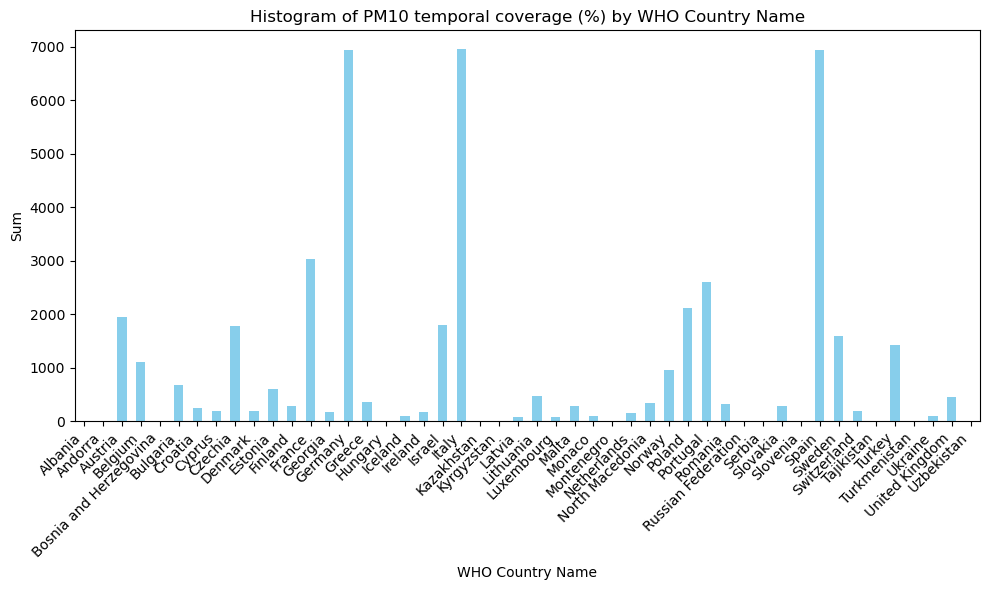

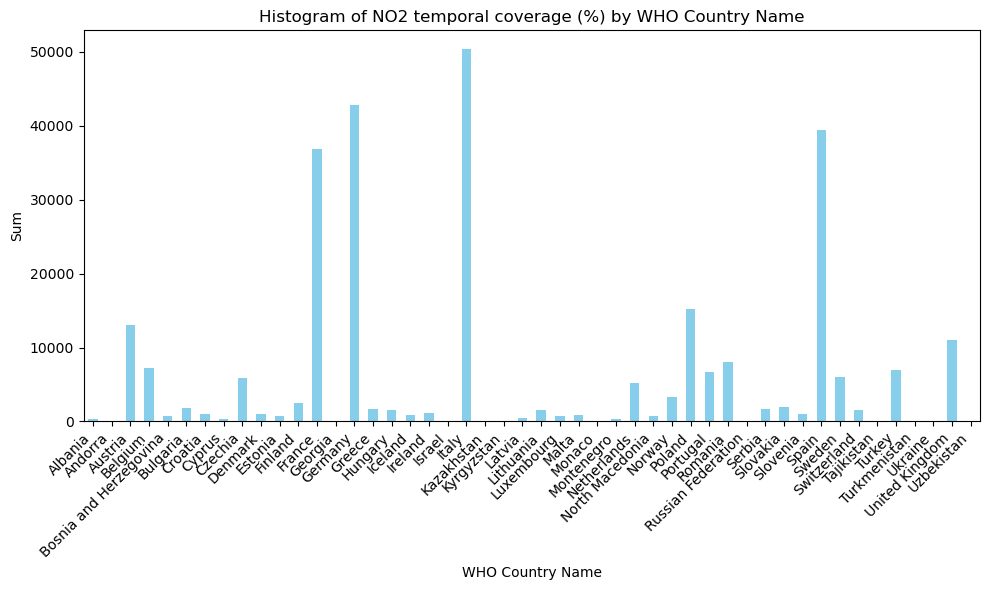

In [67]:
eur_data = df_coords_eur.groupby('WHO Country Name').sum()

for variable in variables:
    plt.figure(figsize=(10, 6))
    eur_data[variable].plot(kind='bar', color='skyblue')
    plt.title(f'Histogram of {variable} by WHO Country Name')
    plt.xlabel('WHO Country Name')
    plt.ylabel('Sum')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


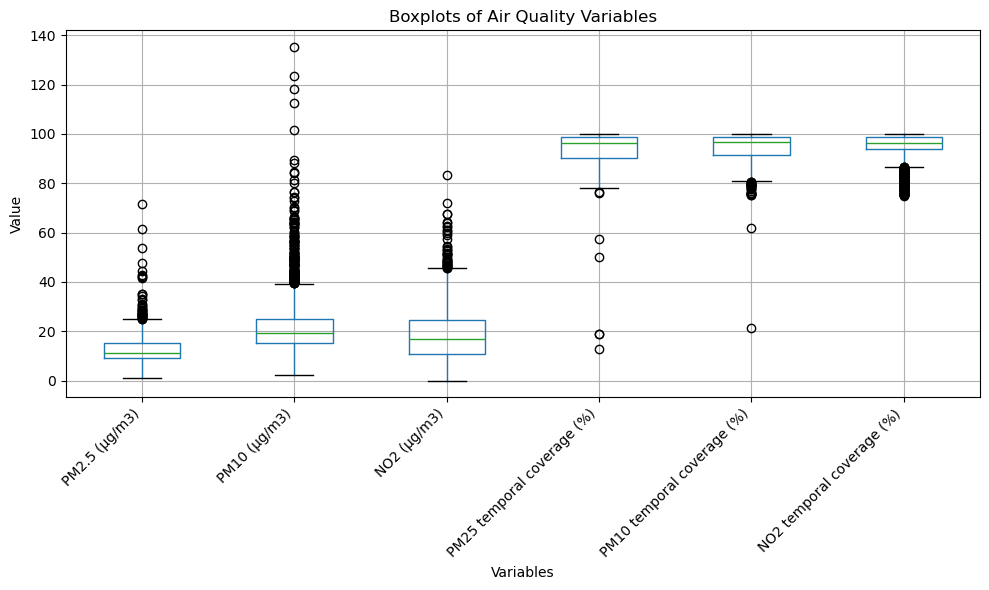

In [68]:
plt.figure(figsize=(10, 6))
df_coords_eur[variables].boxplot()
plt.title('Boxplots of Air Quality Variables')
plt.ylabel('Value')
plt.xlabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

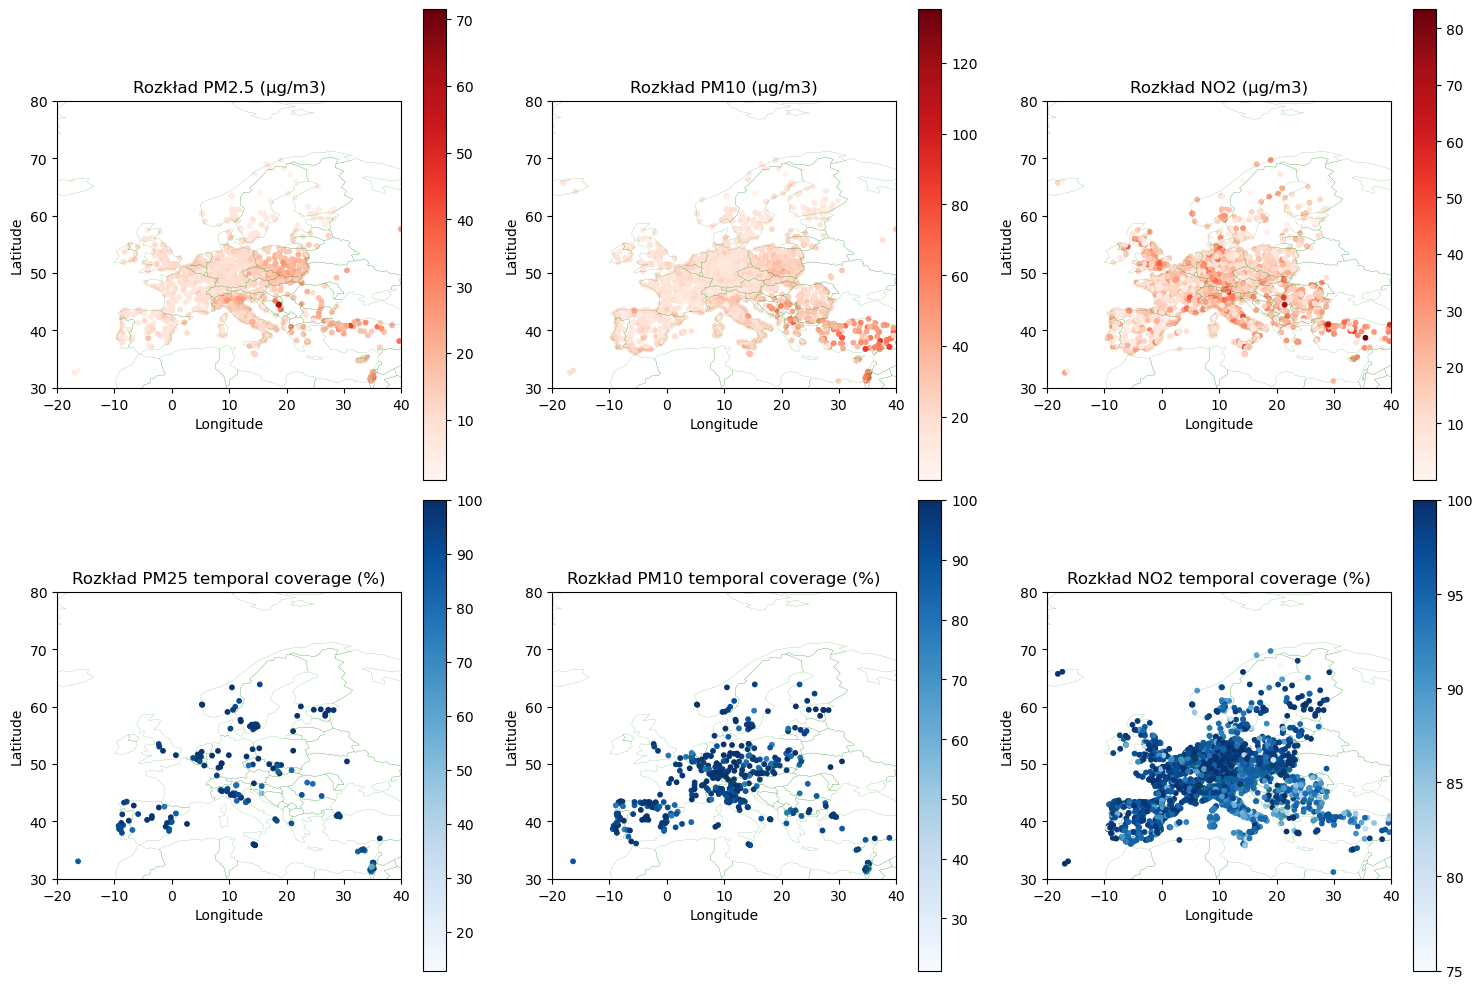

In [69]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"), engine="pyogrio")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, variable in enumerate(variables):
    ax = axes[i]
    ax.set_xlim([-20, 40])
    ax.set_ylim([30, 80])
      
    geometry = gpd.points_from_xy(df_coords_eur['Longitude'], df_coords_eur['Latitude'])
    
    gdf = gpd.GeoDataFrame(df_coords_eur, geometry=geometry)
    
    cmap = 'Reds' if 'coverage' not in variable else 'Blues'
    gdf.plot(ax=ax, column=variable, cmap=cmap, legend=True, markersize=10)
    
    world.boundary.plot(ax=ax, linewidth=0.1, color="green")
    
    ax.set_title(f'Rozkład {variable}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()

In [70]:
df_coords_emr = df_coords[df_coords["WHO Region"] == "Eastern Mediterranean Region"]
itables.show(df_coords_emr, show_index=False)

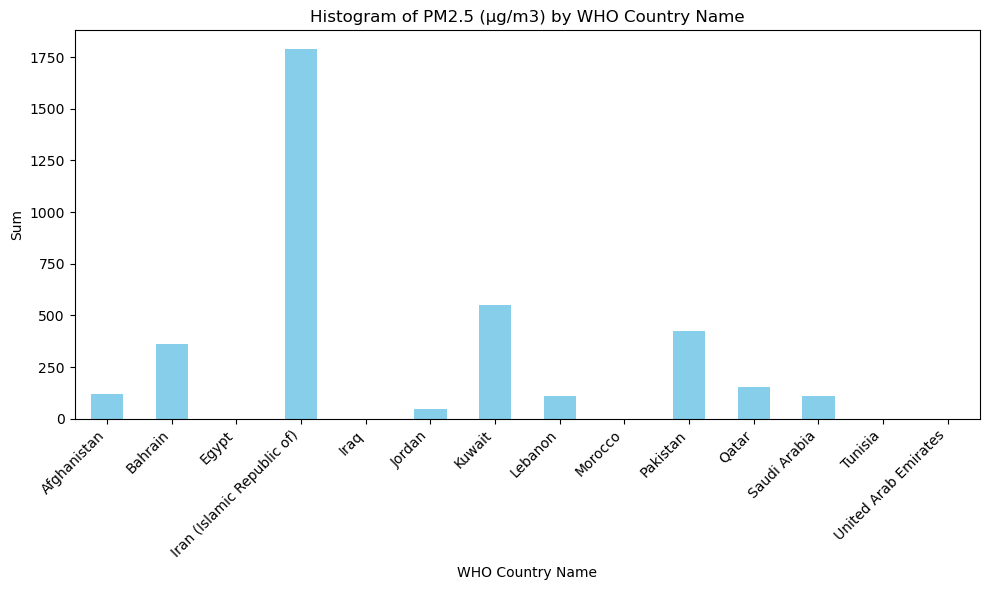

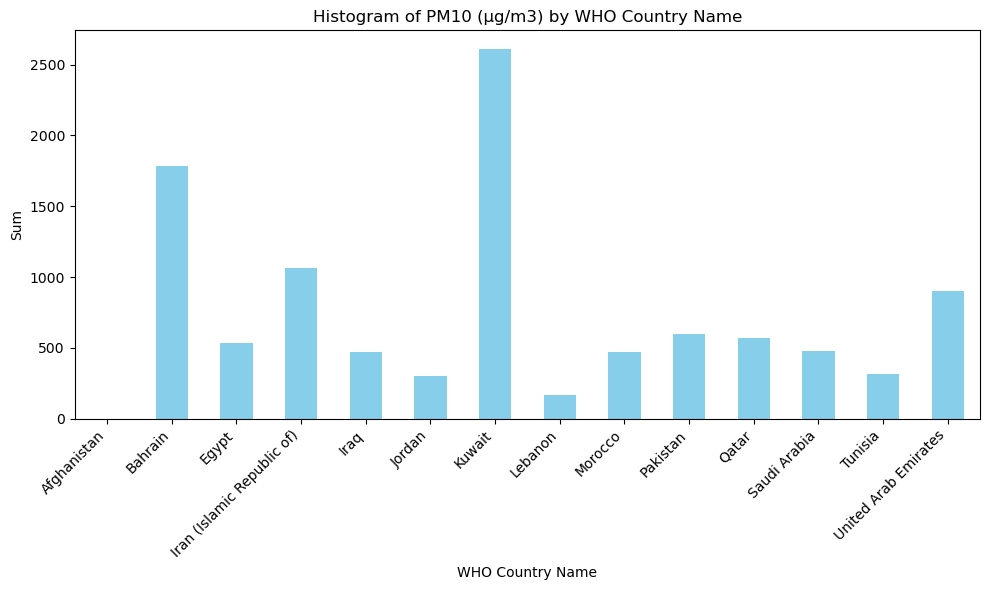

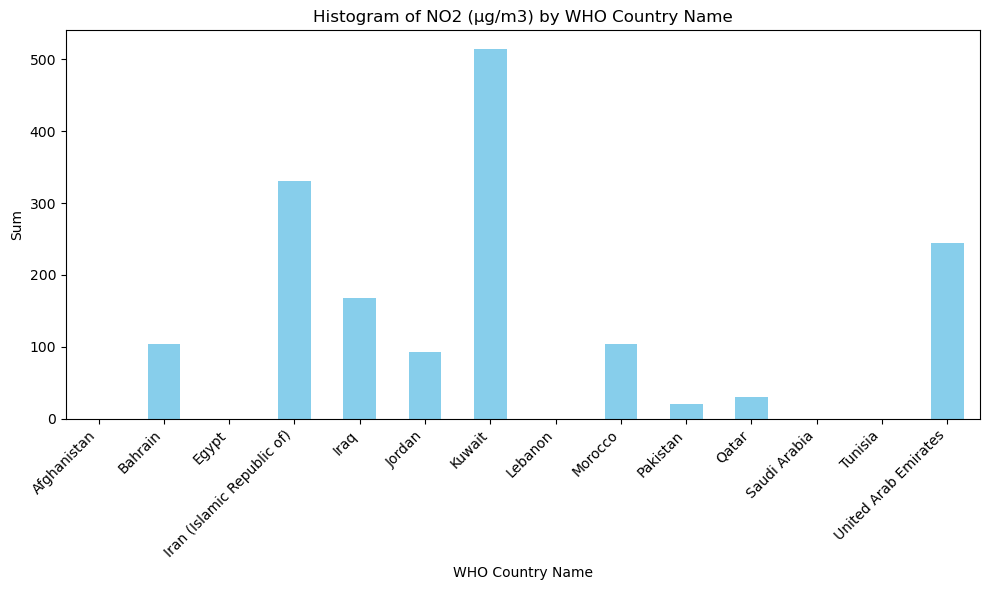

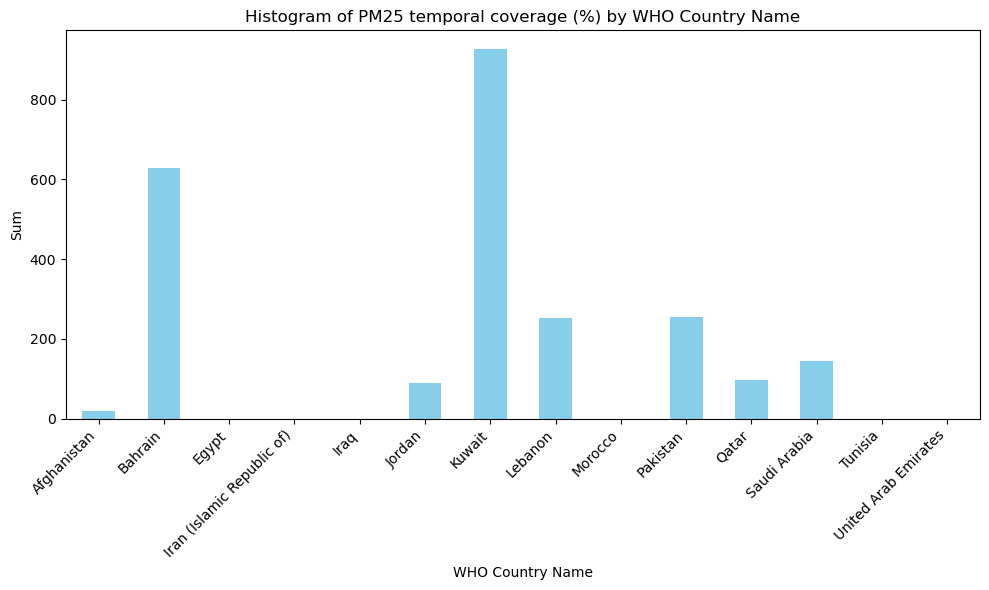

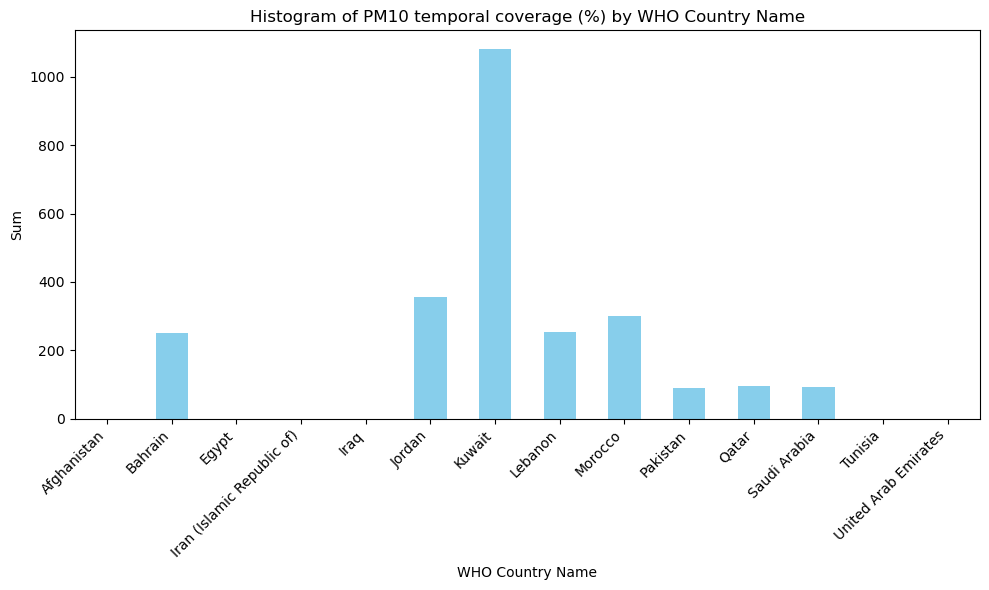

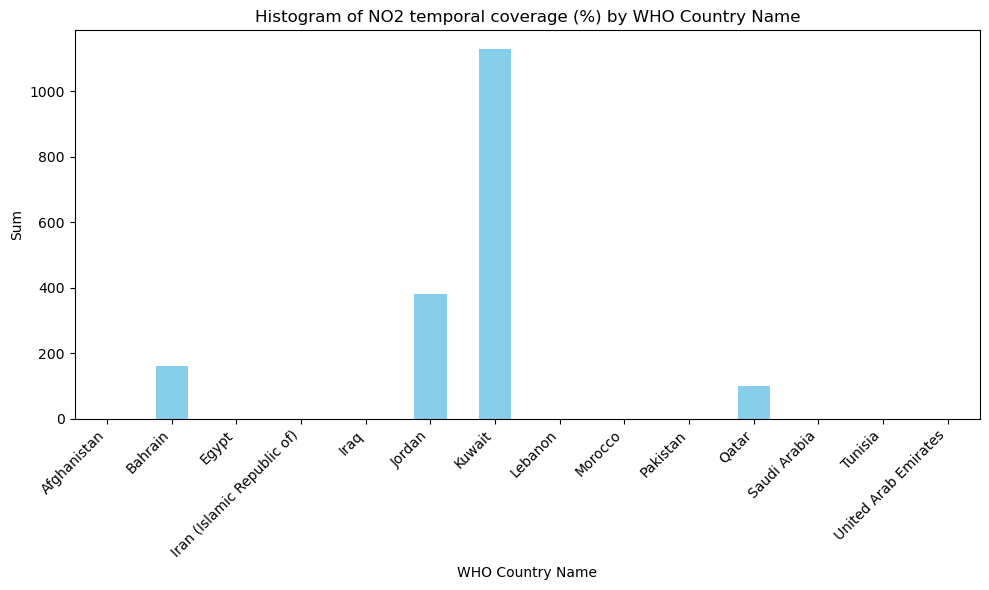

In [71]:
emr_data = df_coords_emr.groupby('WHO Country Name').sum()

for variable in variables:
    plt.figure(figsize=(10, 6))
    emr_data[variable].plot(kind='bar', color='skyblue')
    plt.title(f'Histogram of {variable} by WHO Country Name')
    plt.xlabel('WHO Country Name')
    plt.ylabel('Sum')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


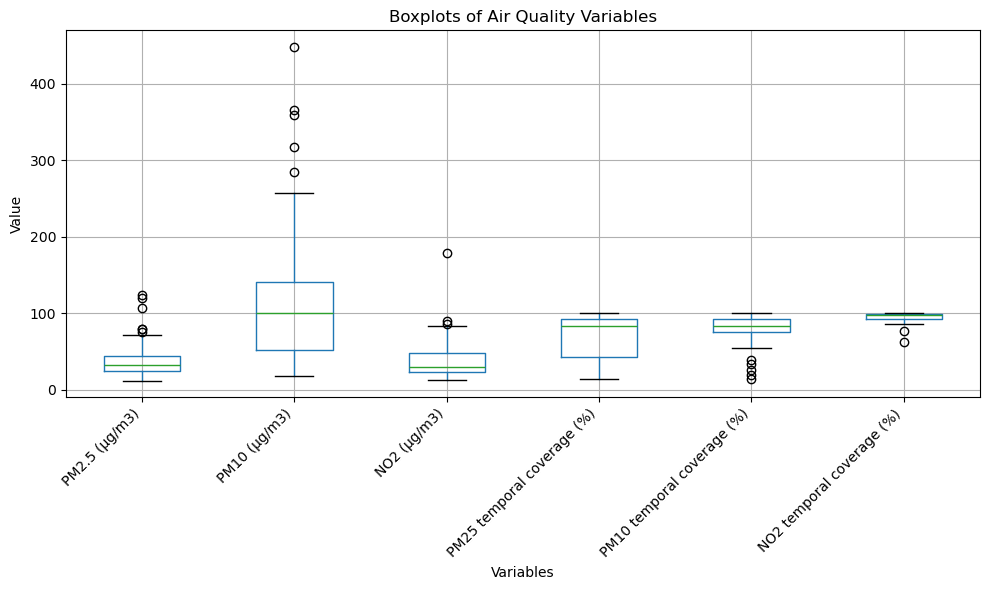

In [72]:
plt.figure(figsize=(10, 6))
df_coords_emr[variables].boxplot()
plt.title('Boxplots of Air Quality Variables')
plt.ylabel('Value')
plt.xlabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

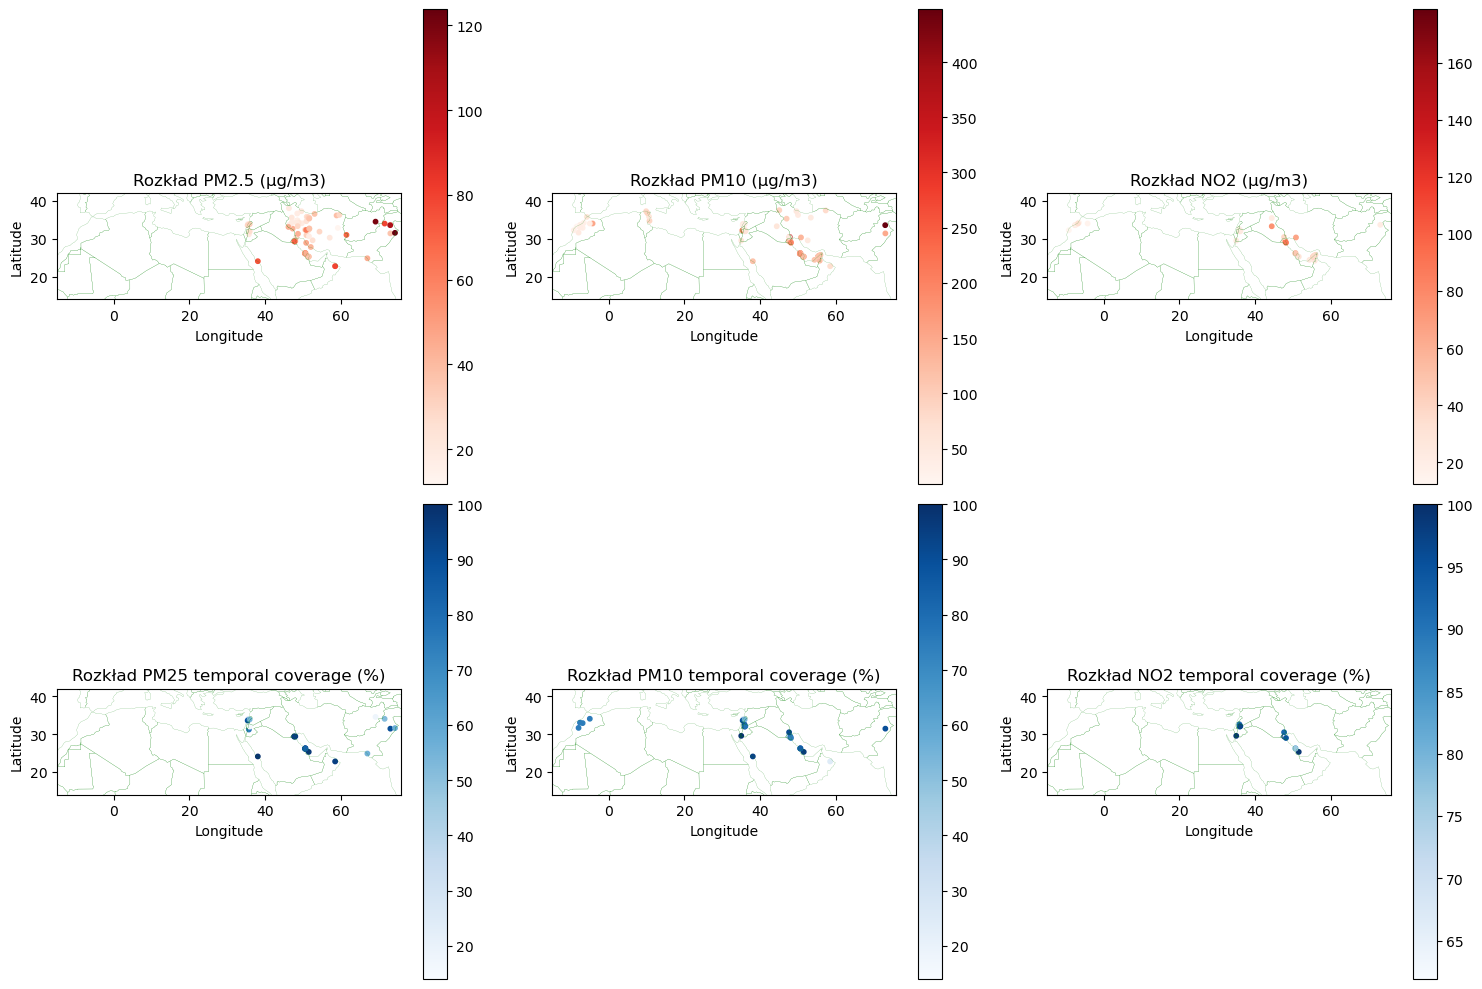

In [73]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"), engine="pyogrio")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, variable in enumerate(variables):
    ax = axes[i]
    ax.set_xlim([-15, 76])
    ax.set_ylim([14, 42])
      
    geometry = gpd.points_from_xy(df_coords_emr['Longitude'], df_coords_emr['Latitude'])
    
    gdf = gpd.GeoDataFrame(df_coords_emr, geometry=geometry)
    
    cmap = 'Reds' if 'coverage' not in variable else 'Blues'
    gdf.plot(ax=ax, column=variable, cmap=cmap, legend=True, markersize=10)
    
    world.boundary.plot(ax=ax, linewidth=0.1, color="green")
    
    ax.set_title(f'Rozkład {variable}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()

In [74]:
df_coords_afr = df_coords[df_coords["WHO Region"] == "African Region"]

itables.show(df_coords_afr, show_index=False)

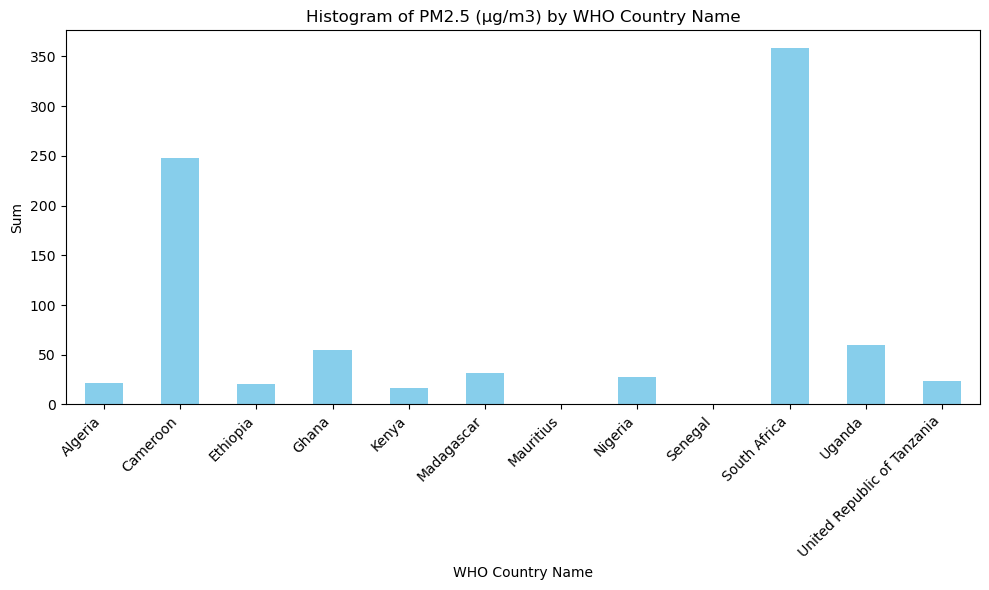

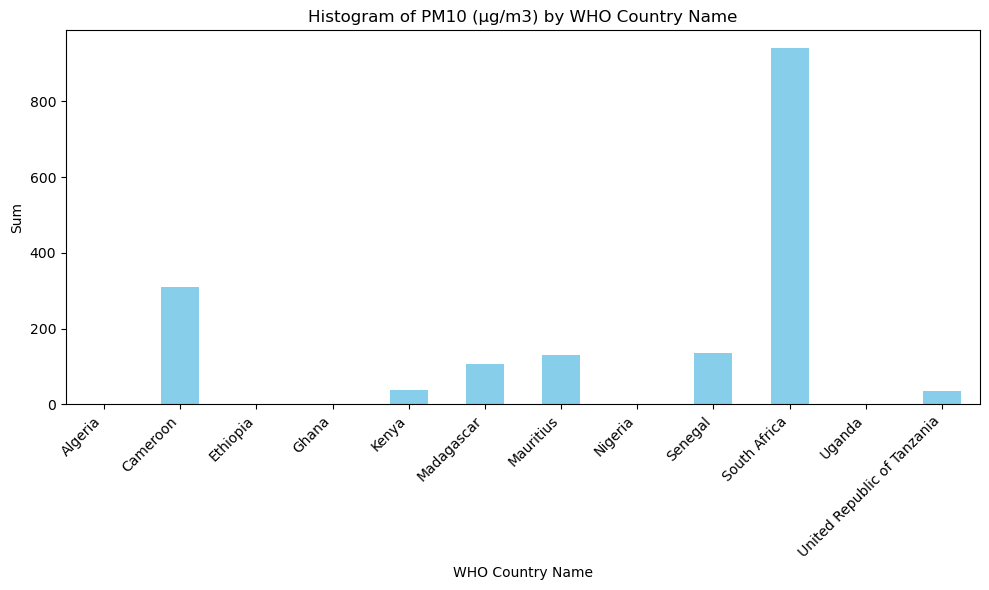

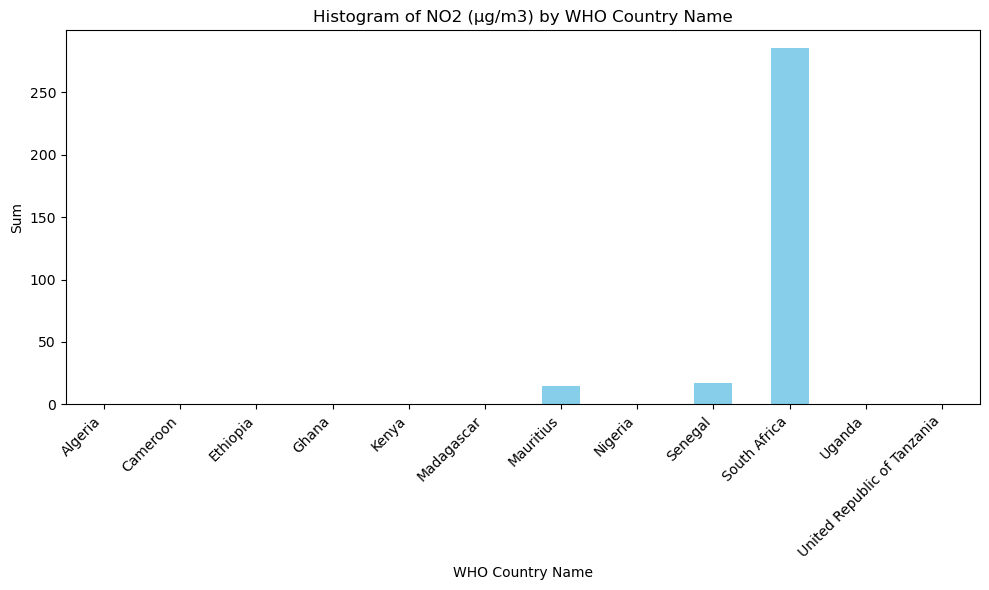

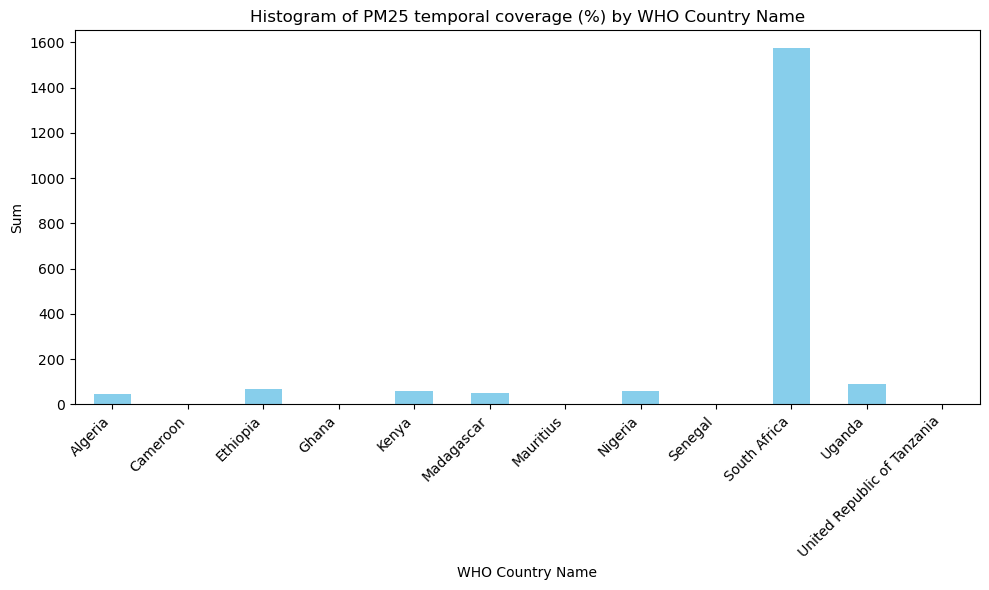

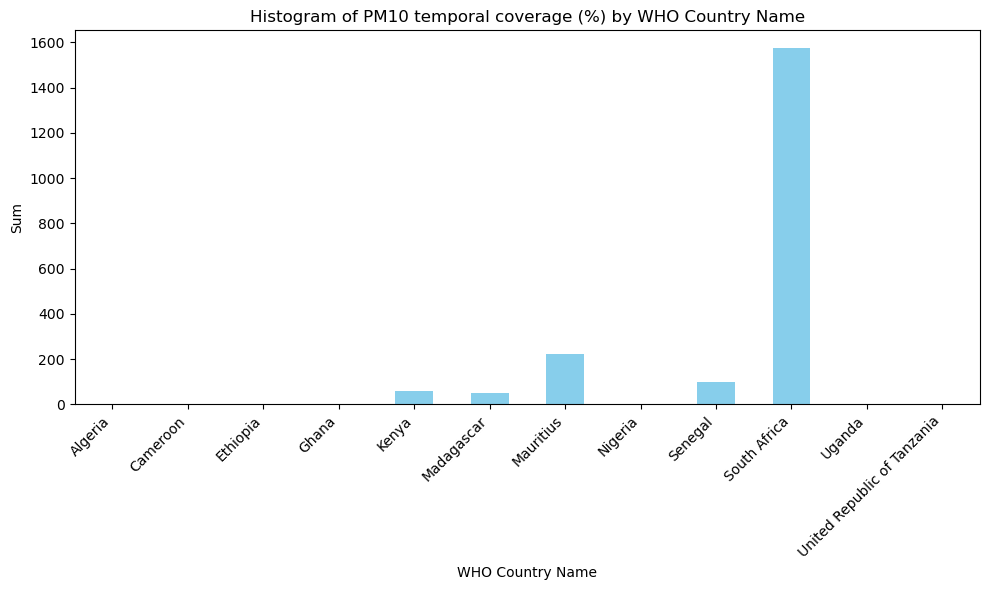

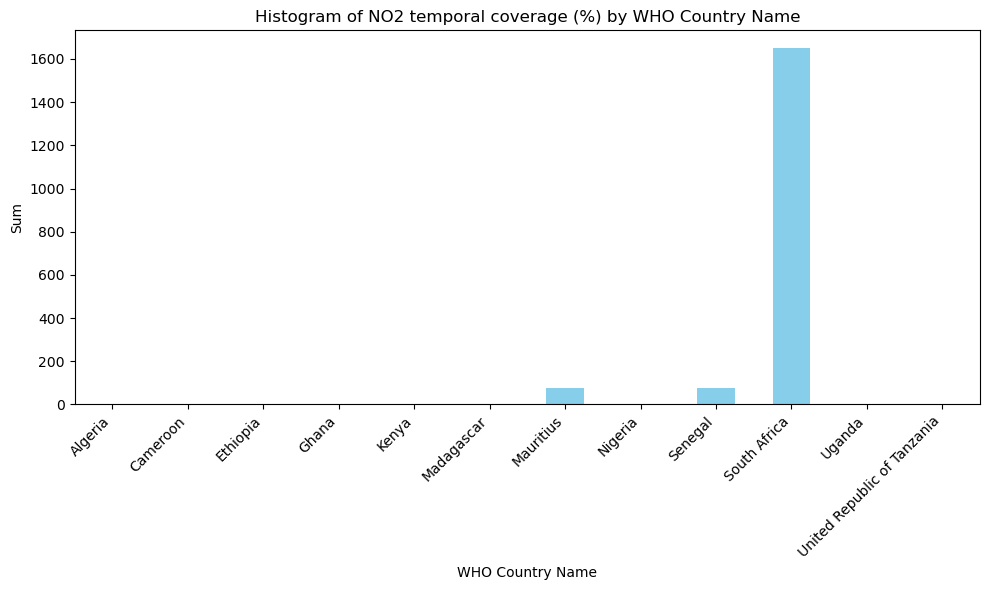

In [75]:
afr_data = df_coords_afr.groupby('WHO Country Name').sum()

for variable in variables:
    plt.figure(figsize=(10, 6))
    afr_data[variable].plot(kind='bar', color='skyblue')
    plt.title(f'Histogram of {variable} by WHO Country Name')
    plt.xlabel('WHO Country Name')
    plt.ylabel('Sum')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

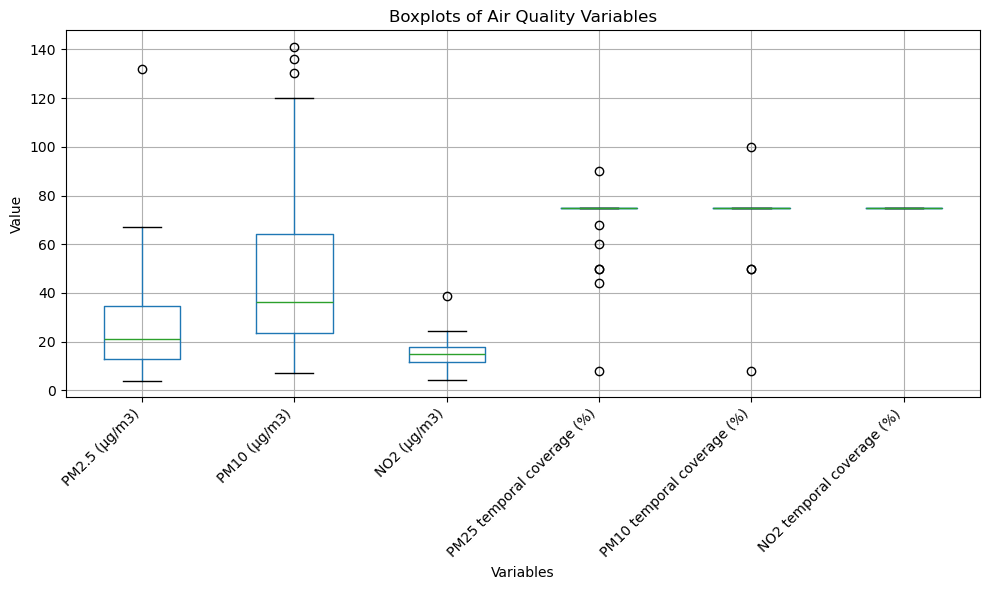

In [76]:
variables = ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)', 'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)']

plt.figure(figsize=(10, 6))
df_coords_afr[variables].boxplot()
plt.title('Boxplots of Air Quality Variables')
plt.ylabel('Value')
plt.xlabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


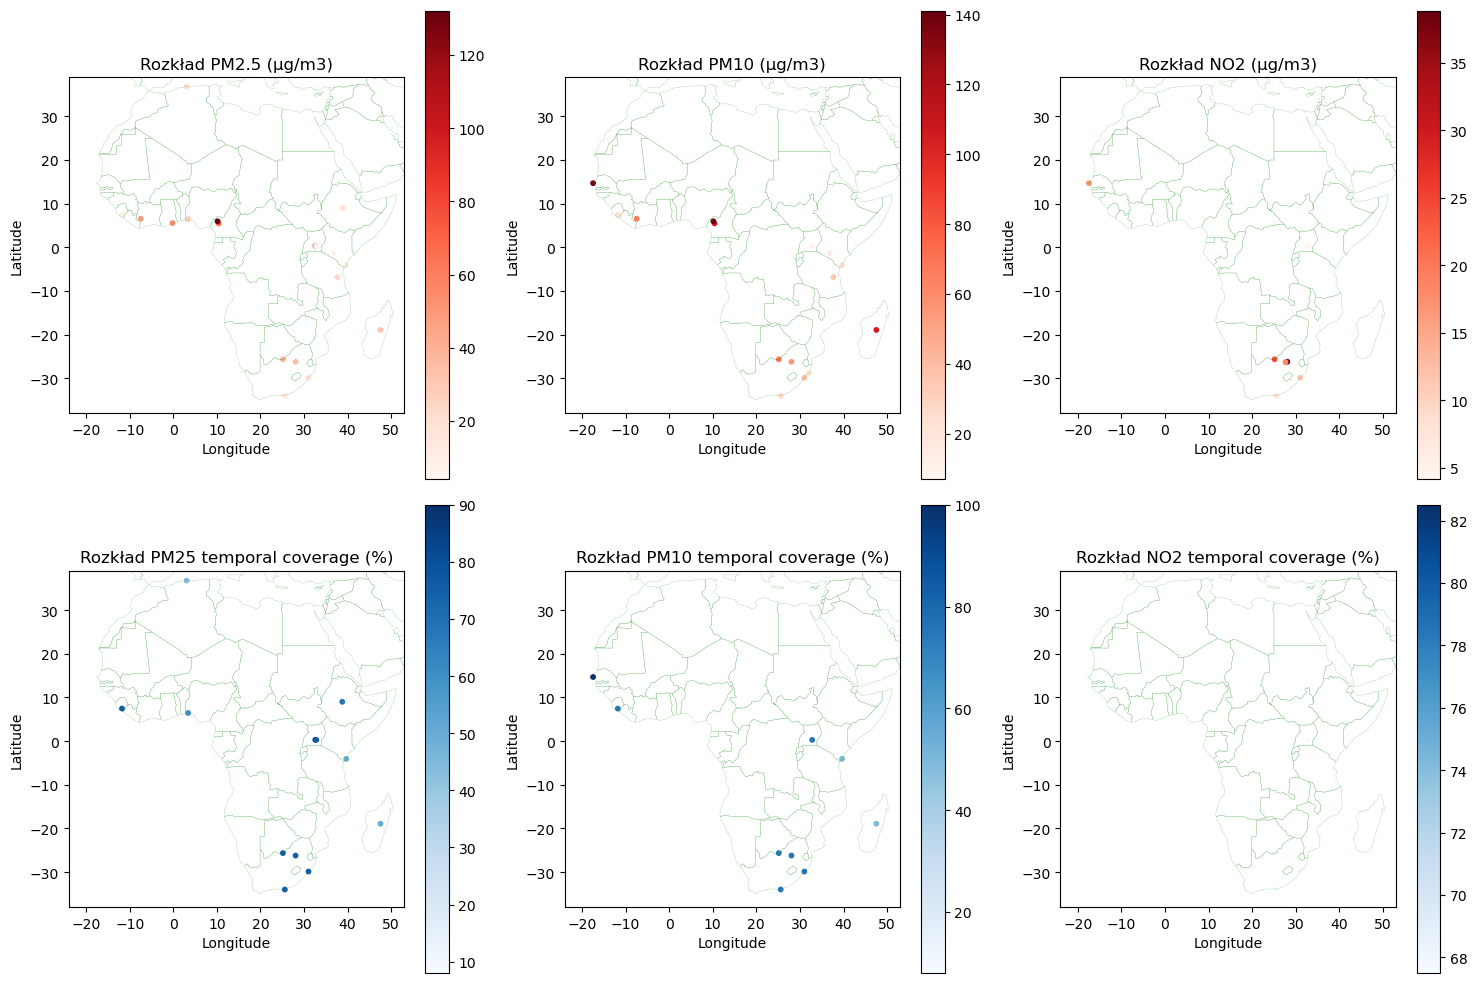

In [77]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"), engine="pyogrio")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, variable in enumerate(variables):
    ax = axes[i]
    ax.set_xlim([-24, 53])
    ax.set_ylim([-38, 39])
      
    geometry = gpd.points_from_xy(df_coords_afr['Longitude'], df_coords_afr['Latitude'])
    
    gdf = gpd.GeoDataFrame(df_coords_afr, geometry=geometry)
    
    cmap = 'Reds' if 'coverage' not in variable else 'Blues'
    gdf.plot(ax=ax, column=variable, cmap=cmap, legend=True, markersize=10)
    
    world.boundary.plot(ax=ax, linewidth=0.1, color="green")
    
    ax.set_title(f'Rozkład {variable}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()

In [78]:
df_coords_ame = df_coords[df_coords["WHO Region"] == "Region of the Americas"]

itables.show(df_coords_ame, show_index=False)

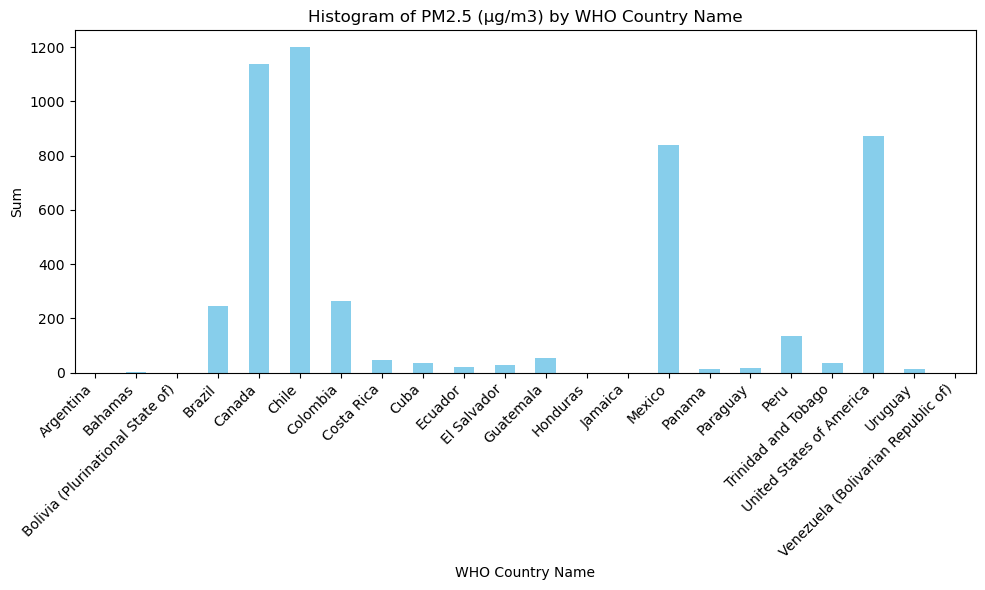

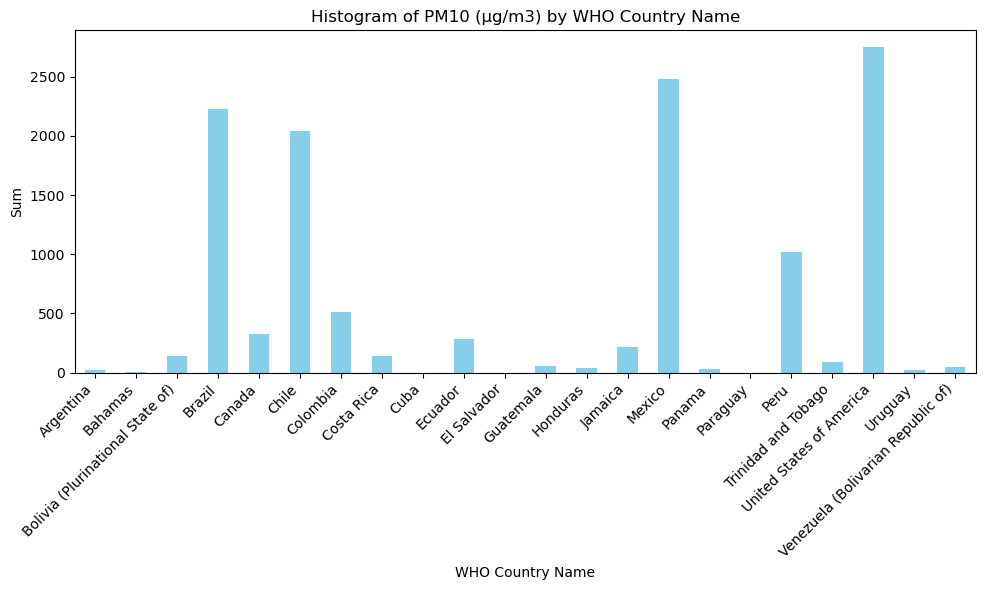

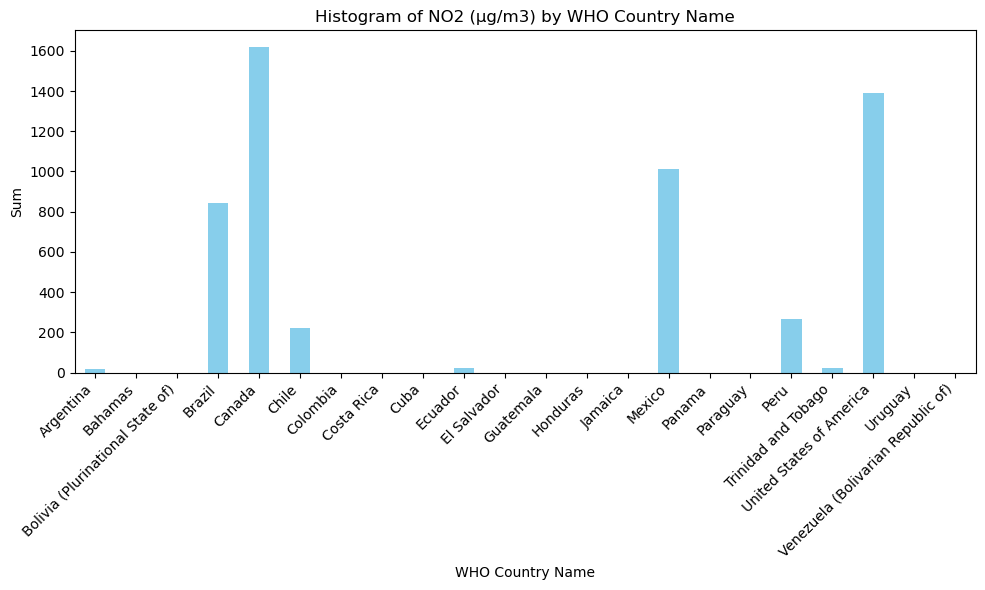

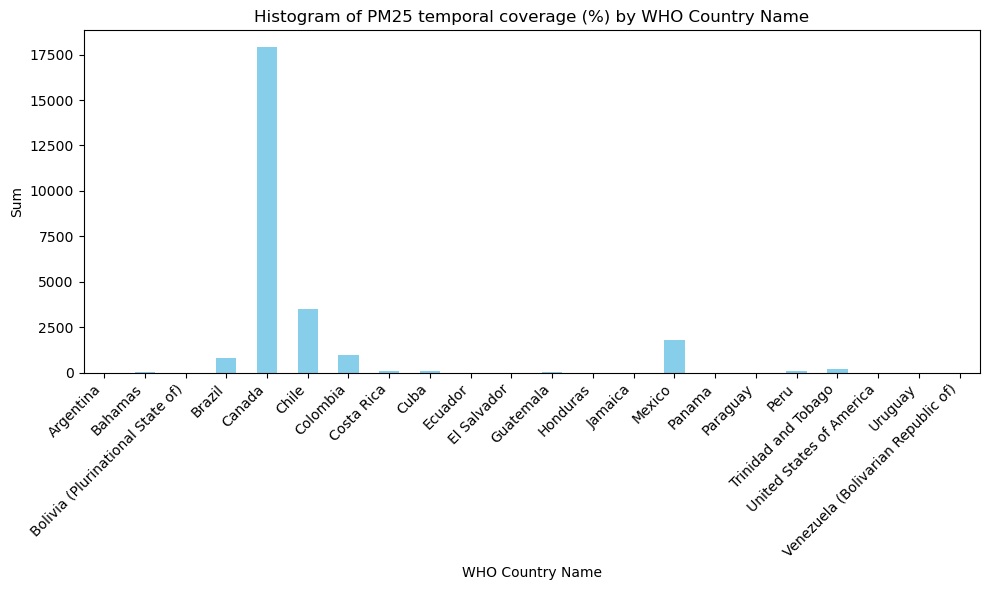

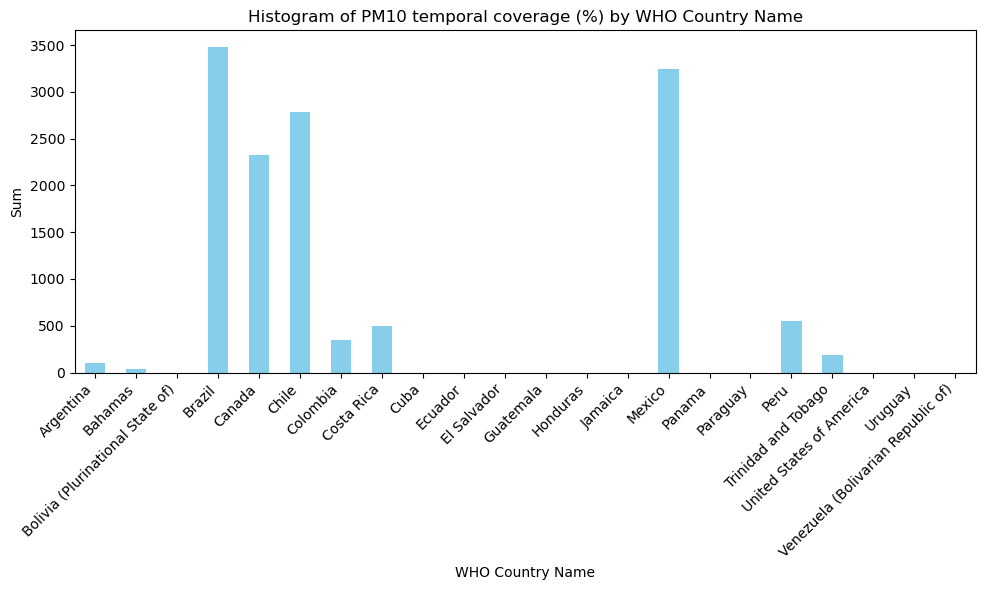

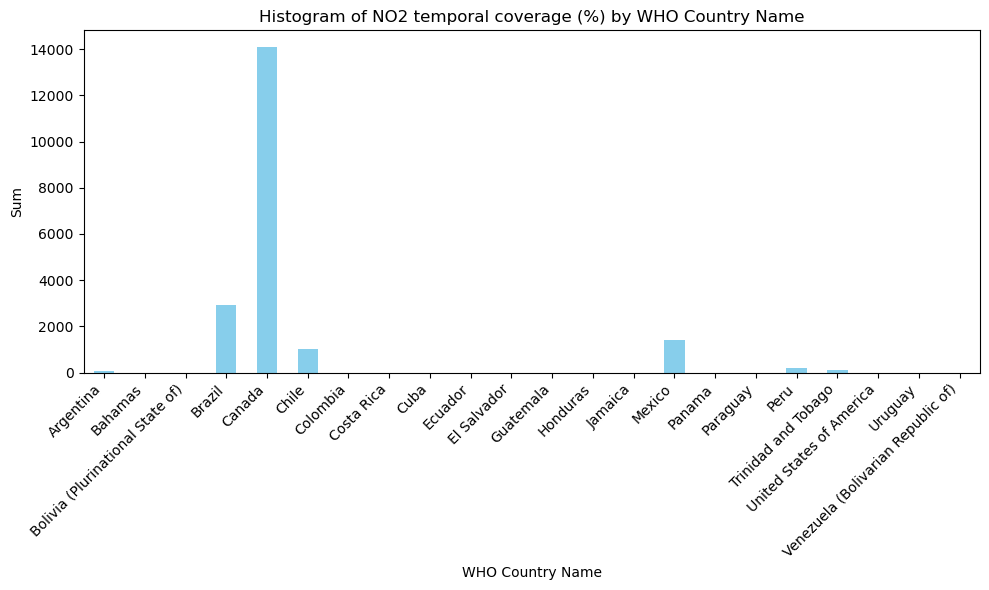

In [79]:
ame_data = df_coords_ame.groupby('WHO Country Name').sum()

for variable in variables:
    plt.figure(figsize=(10, 6))
    ame_data[variable].plot(kind='bar', color='skyblue')
    plt.title(f'Histogram of {variable} by WHO Country Name')
    plt.xlabel('WHO Country Name')
    plt.ylabel('Sum')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

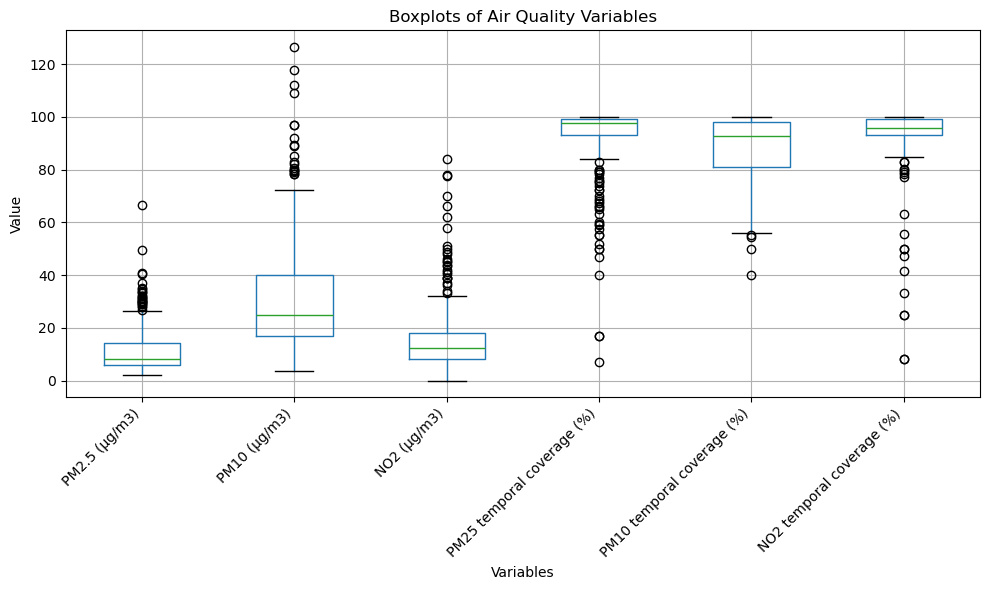

In [80]:
variables = ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)', 'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)']

plt.figure(figsize=(10, 6))
df_coords_ame[variables].boxplot()
plt.title('Boxplots of Air Quality Variables')
plt.ylabel('Value')
plt.xlabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


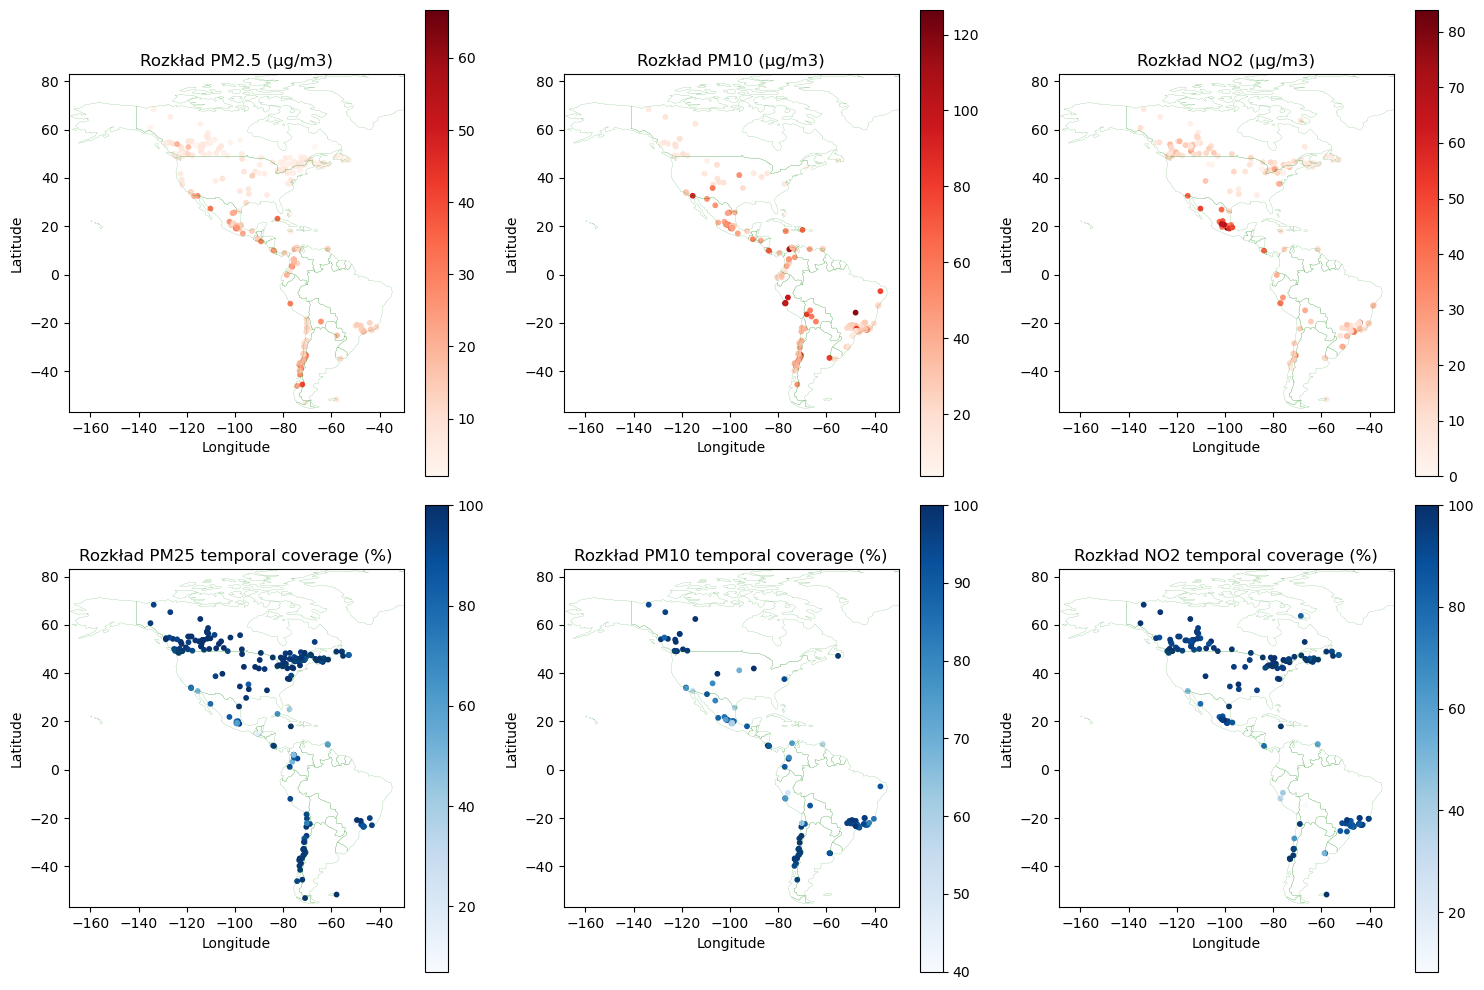

In [81]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"), engine="pyogrio")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, variable in enumerate(variables):
    ax = axes[i]
    ax.set_xlim([-169, -30])
    ax.set_ylim([-57, 83])
      
    geometry = gpd.points_from_xy(df_coords_ame['Longitude'], df_coords_ame['Latitude'])
    
    gdf = gpd.GeoDataFrame(df_coords_ame, geometry=geometry)
    
    cmap = 'Reds' if 'coverage' not in variable else 'Blues'
    gdf.plot(ax=ax, column=variable, cmap=cmap, legend=True, markersize=10)
    
    world.boundary.plot(ax=ax, linewidth=0.1, color="green")
    
    ax.set_title(f'Rozkład {variable}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()

In [82]:
df_coords_asi = df_coords[df_coords["WHO Region"] == "South East Asia Region"]

itables.show(df_coords_ame, show_index=False)

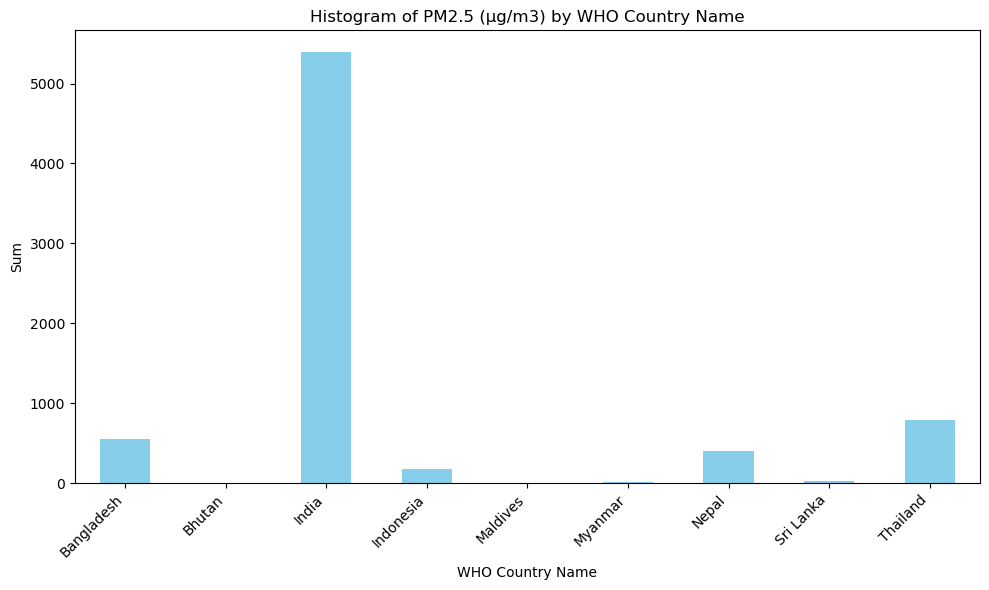

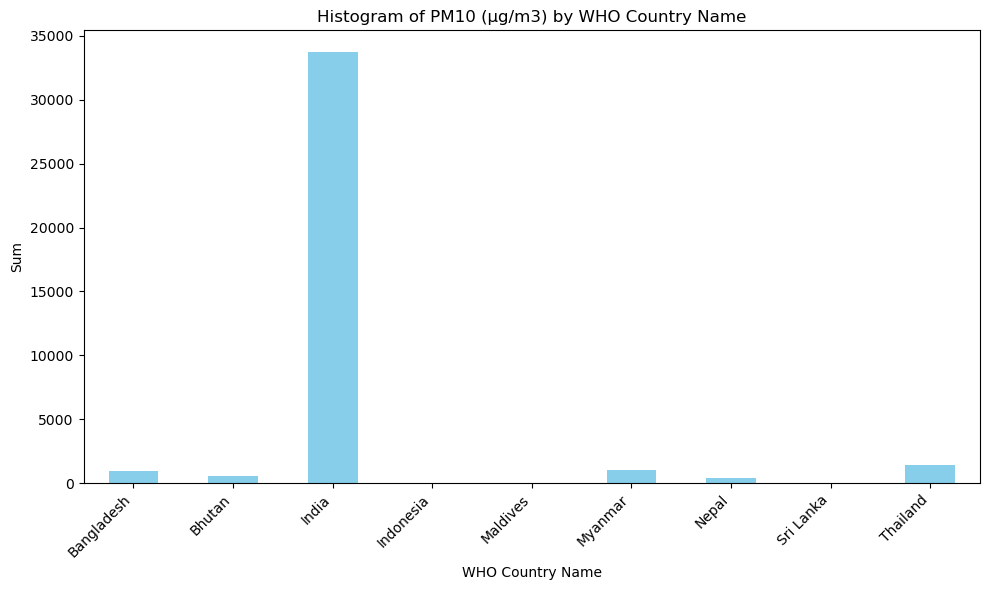

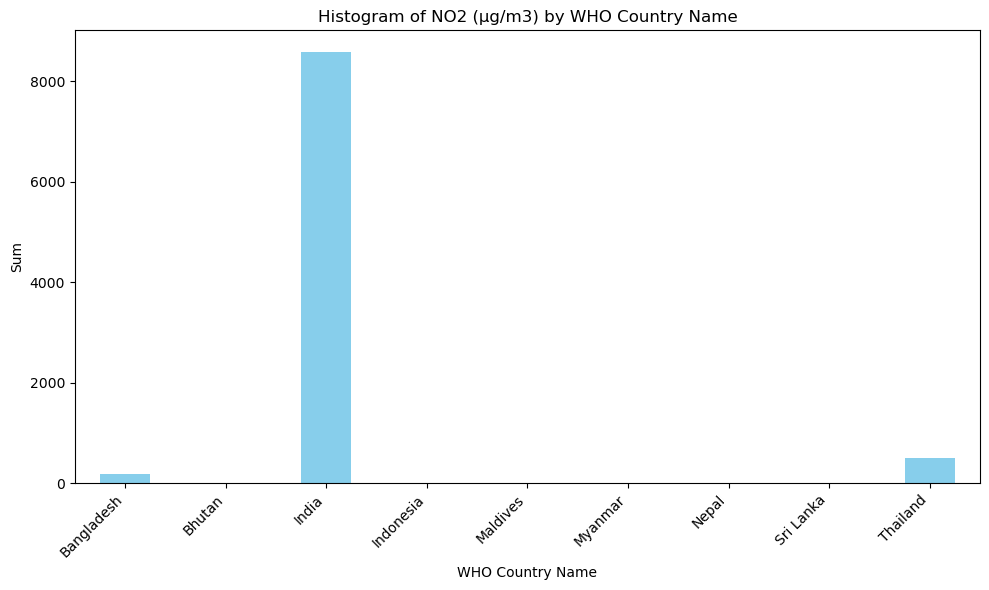

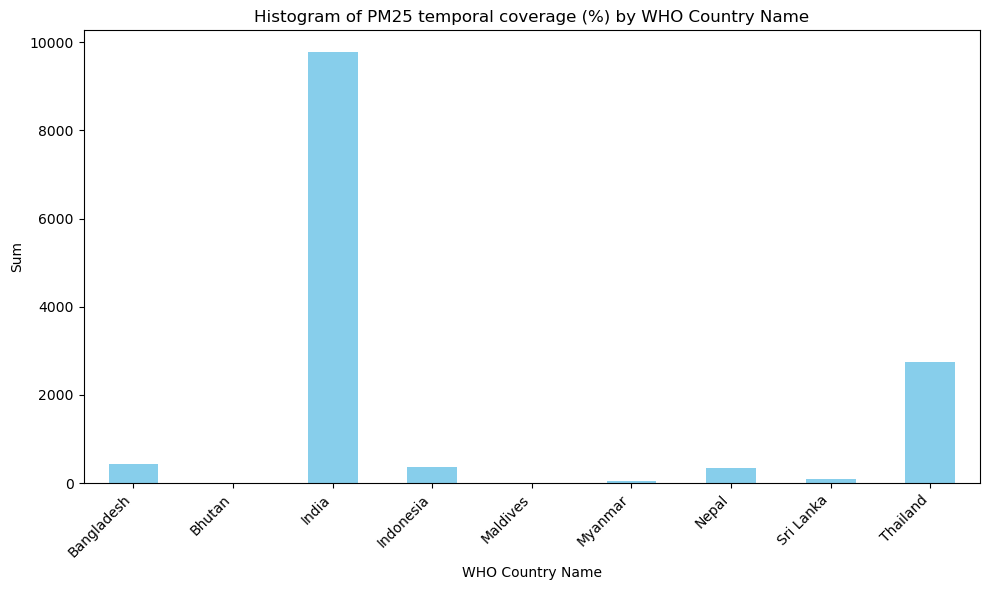

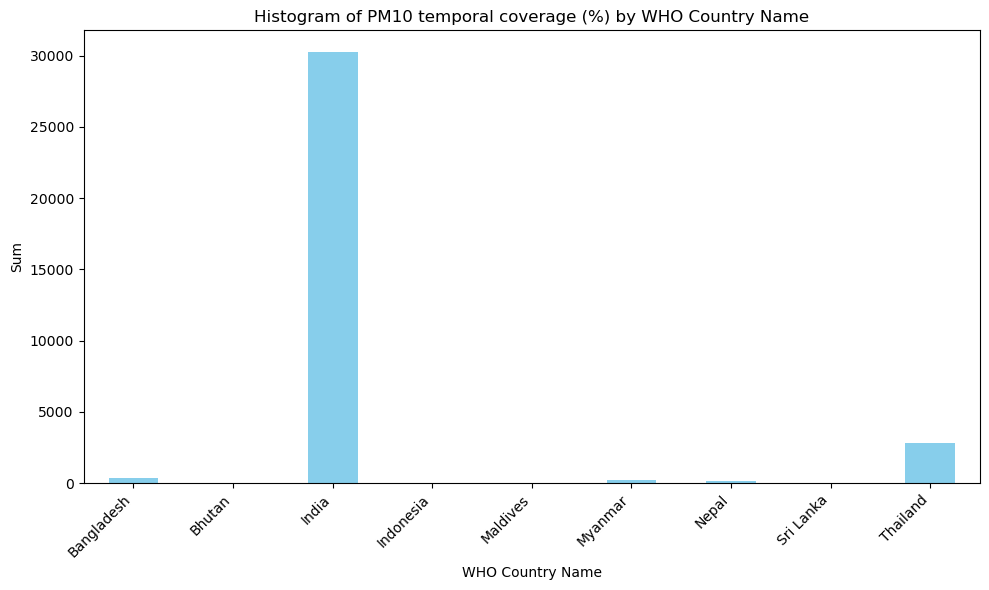

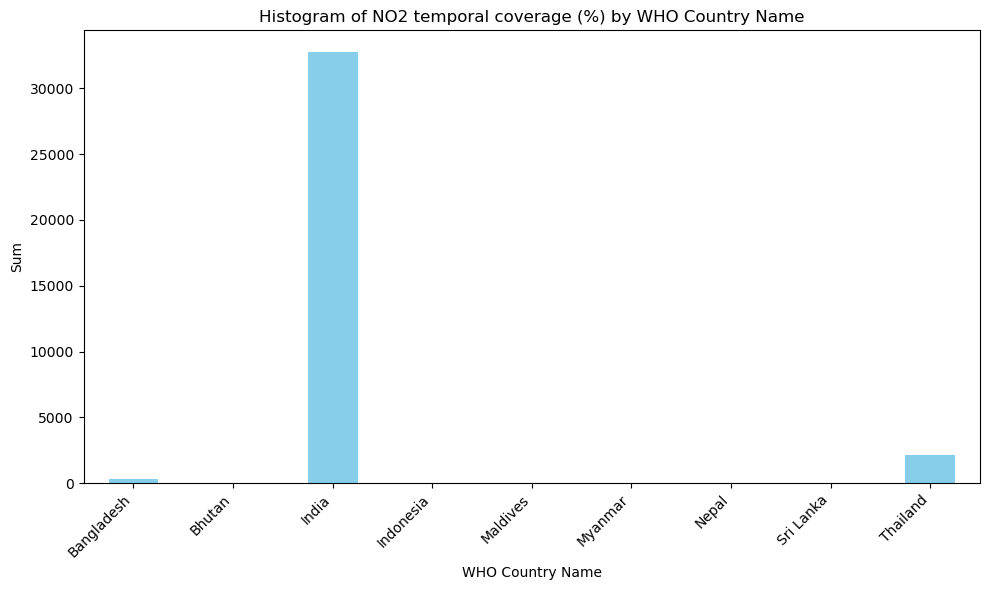

In [83]:
asi_data = df_coords_asi.groupby('WHO Country Name').sum()

for variable in variables:
    plt.figure(figsize=(10, 6))
    asi_data[variable].plot(kind='bar', color='skyblue')
    plt.title(f'Histogram of {variable} by WHO Country Name')
    plt.xlabel('WHO Country Name')
    plt.ylabel('Sum')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

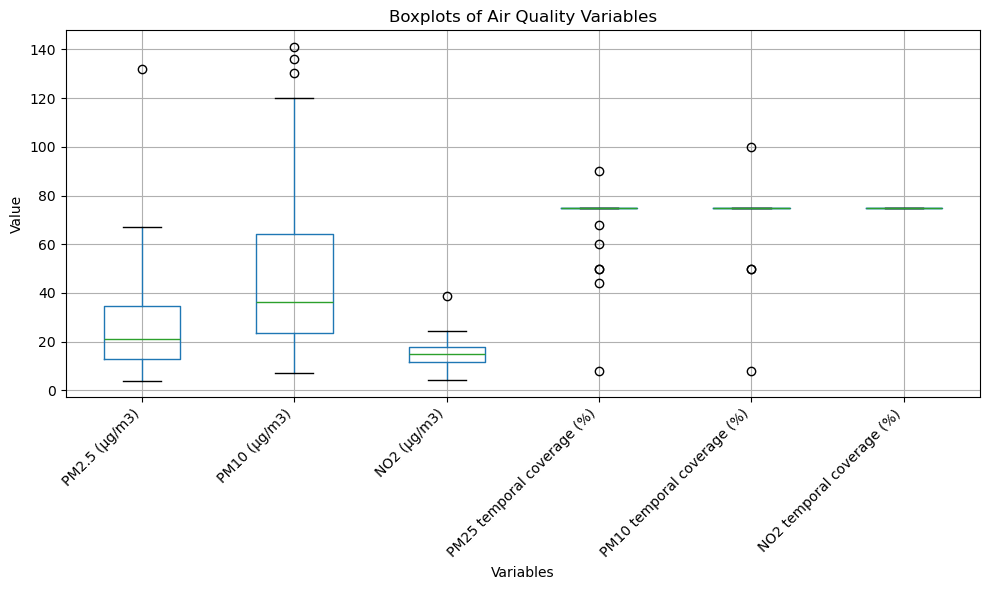

In [84]:
variables = ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)', 'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)']

plt.figure(figsize=(10, 6))
df_coords_afr[variables].boxplot()
plt.title('Boxplots of Air Quality Variables')
plt.ylabel('Value')
plt.xlabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

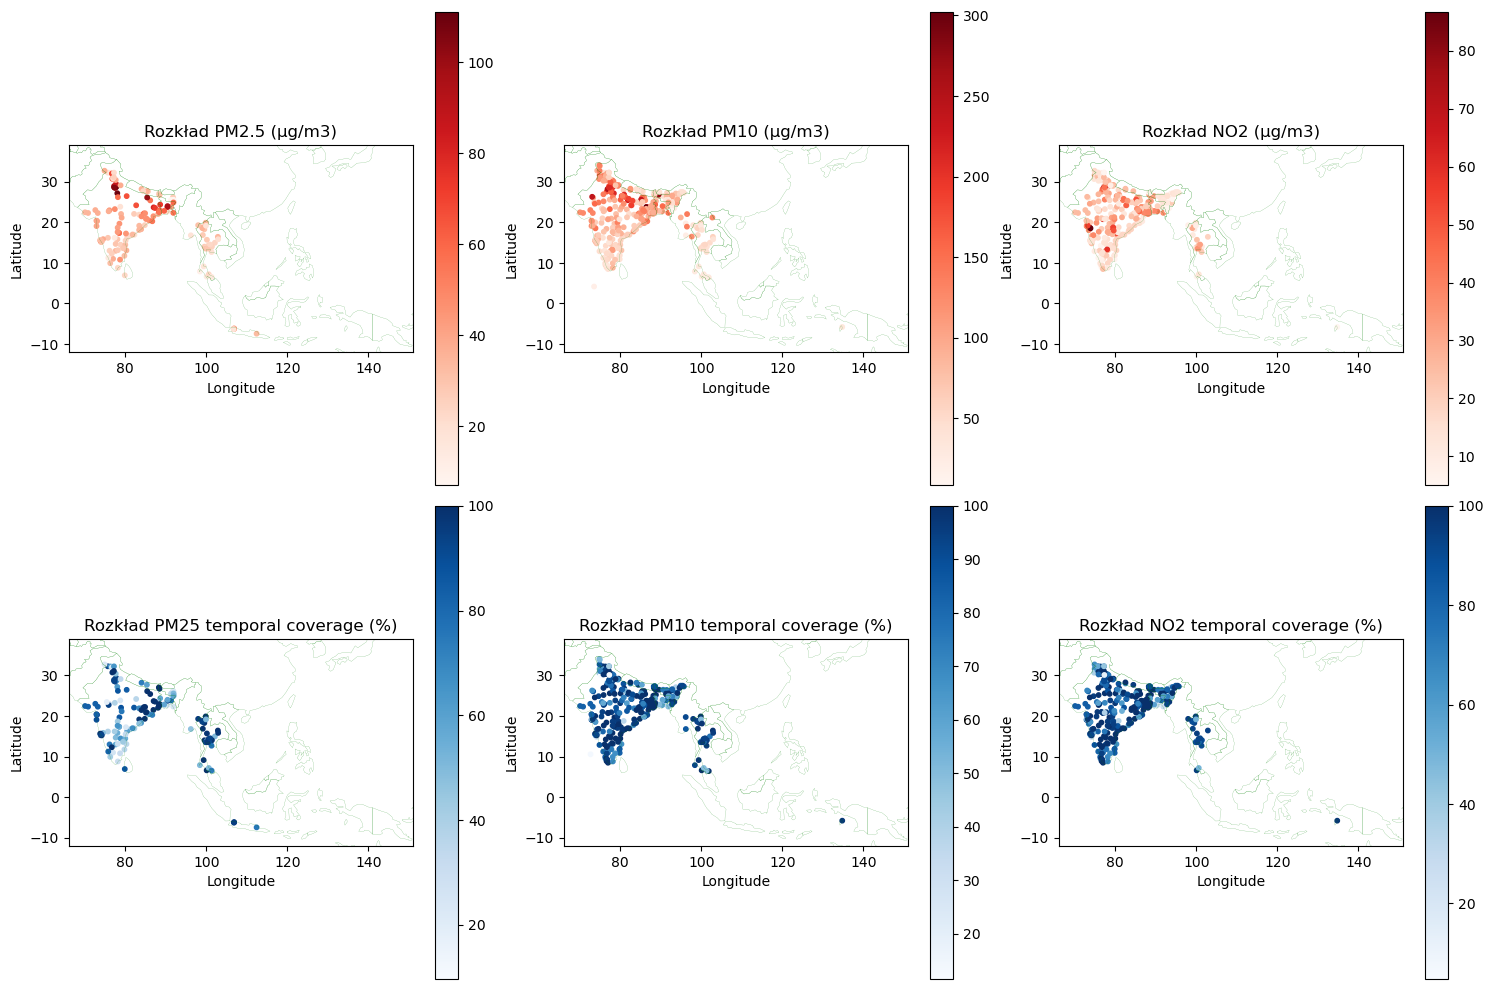

In [85]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"), engine="pyogrio")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, variable in enumerate(variables):
    ax = axes[i]
    ax.set_xlim([66, 151])
    ax.set_ylim([-12, 39])
      
    geometry = gpd.points_from_xy(df_coords_asi['Longitude'], df_coords_asi['Latitude'])
    
    gdf = gpd.GeoDataFrame(df_coords_asi, geometry=geometry)
    
    cmap = 'Reds' if 'coverage' not in variable else 'Blues'
    gdf.plot(ax=ax, column=variable, cmap=cmap, legend=True, markersize=10)
    
    world.boundary.plot(ax=ax, linewidth=0.1, color="green")
    
    ax.set_title(f'Rozkład {variable}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()

In [86]:
df_coords_wpa = df_coords[df_coords["WHO Region"] == "Western Pacific Region"]

itables.show(df_coords_wpa, show_index=False)

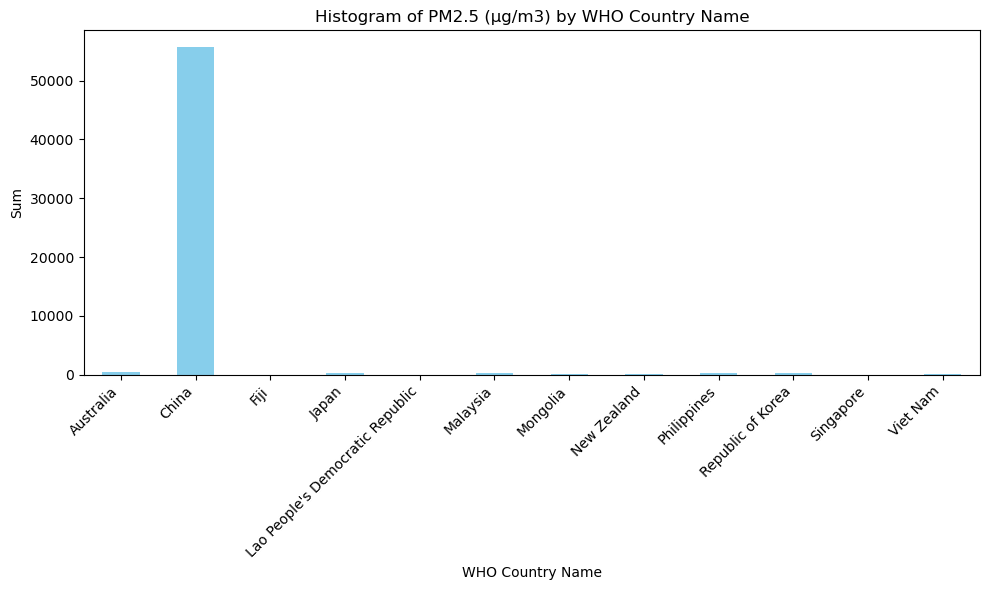

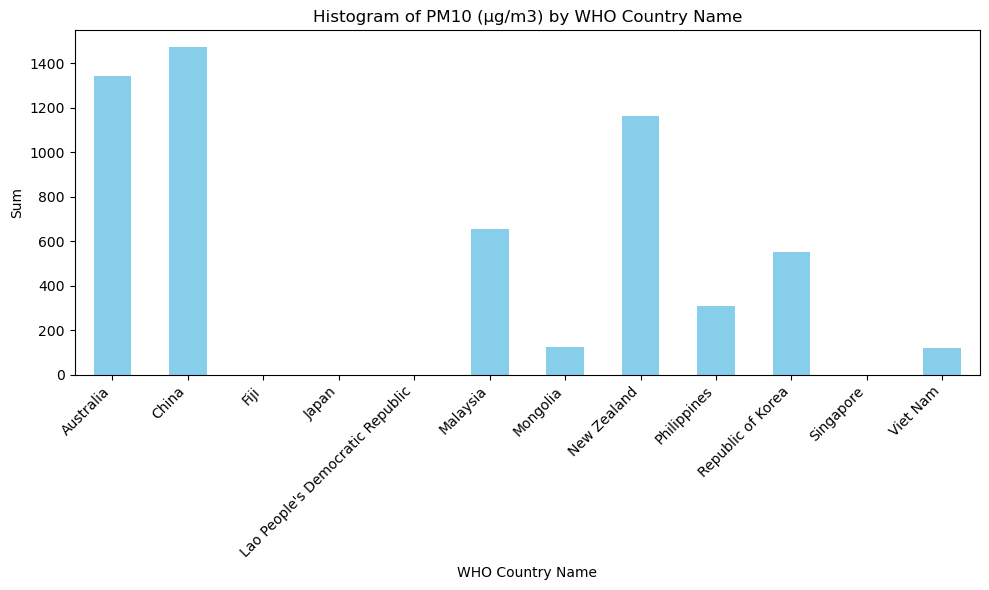

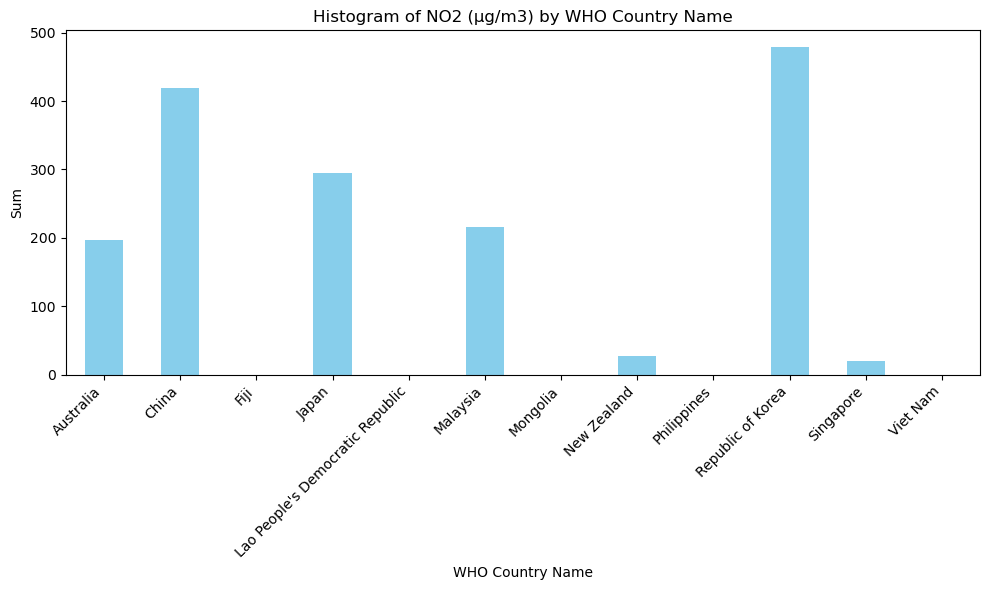

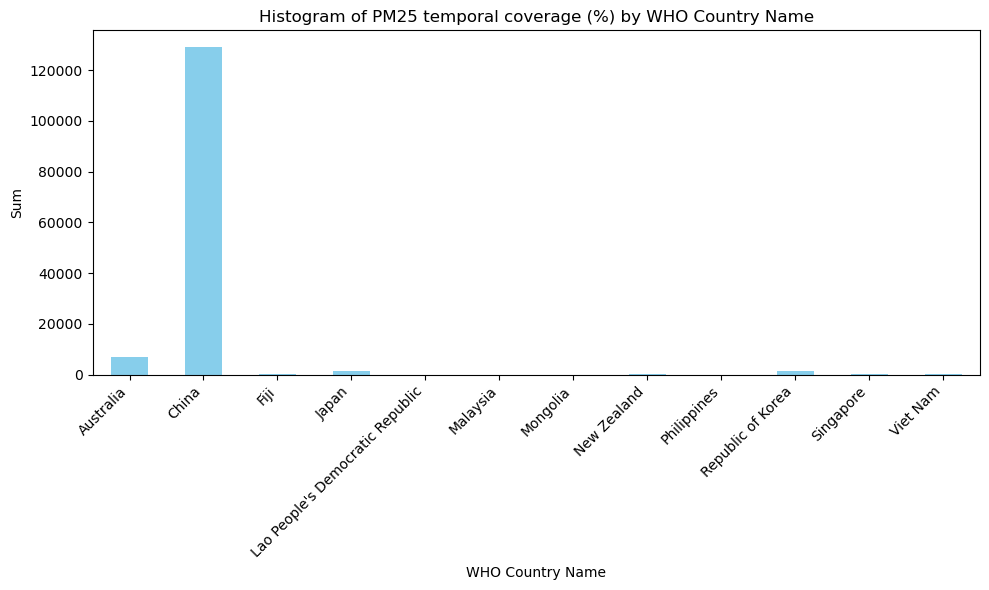

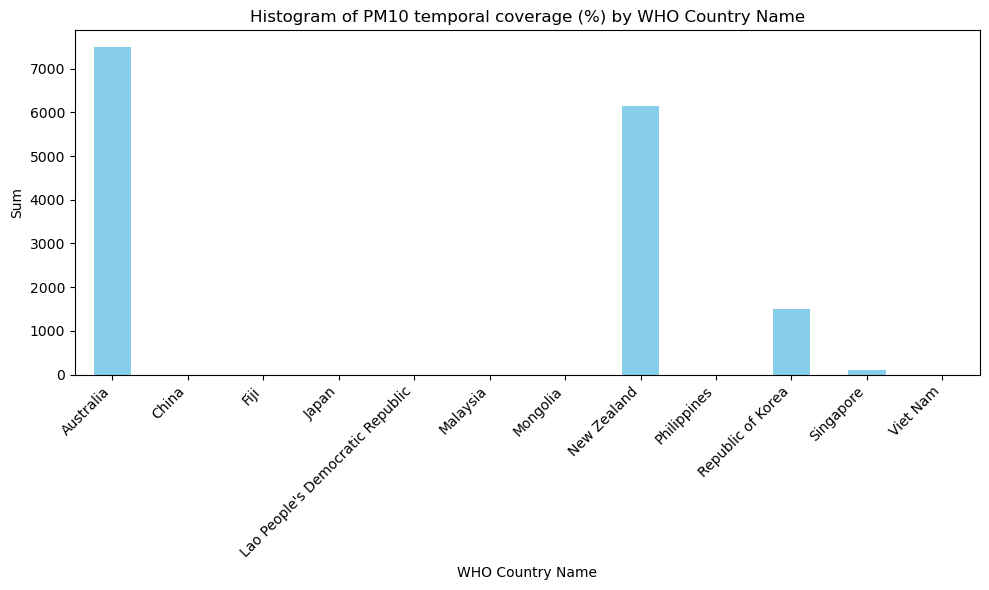

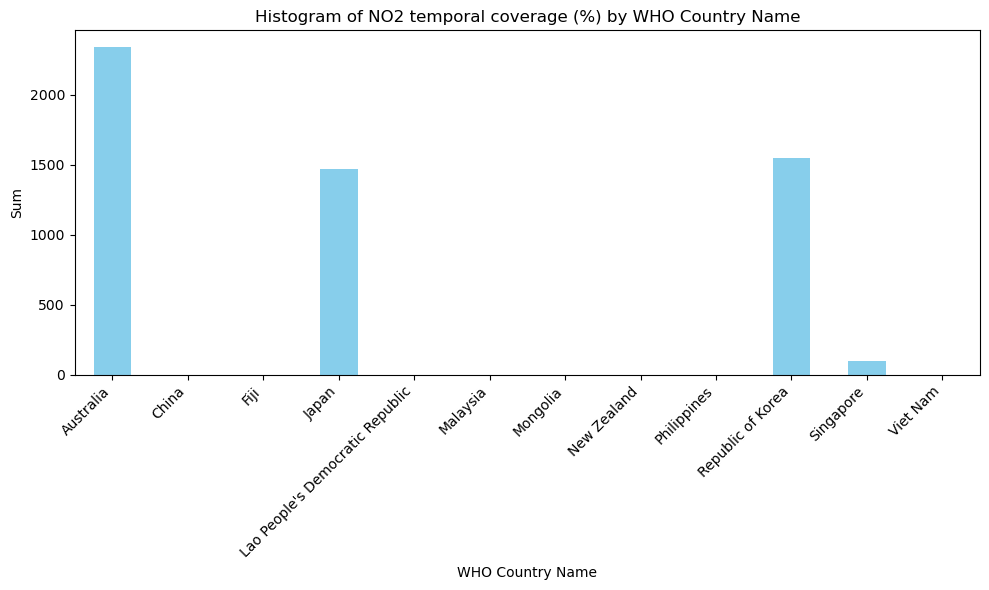

In [87]:
wpa_data = df_coords_wpa.groupby('WHO Country Name').sum()

for variable in variables:
    plt.figure(figsize=(10, 6))
    wpa_data[variable].plot(kind='bar', color='skyblue')
    plt.title(f'Histogram of {variable} by WHO Country Name')
    plt.xlabel('WHO Country Name')
    plt.ylabel('Sum')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

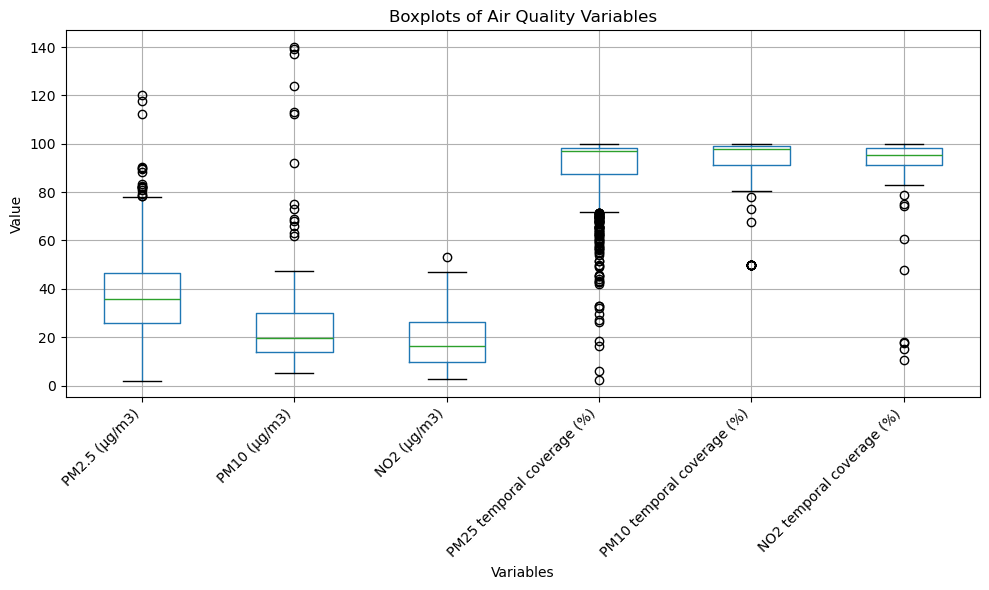

In [88]:
variables = ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)', 'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)']

plt.figure(figsize=(10, 6))
df_coords_wpa[variables].boxplot()
plt.title('Boxplots of Air Quality Variables')
plt.ylabel('Value')
plt.xlabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

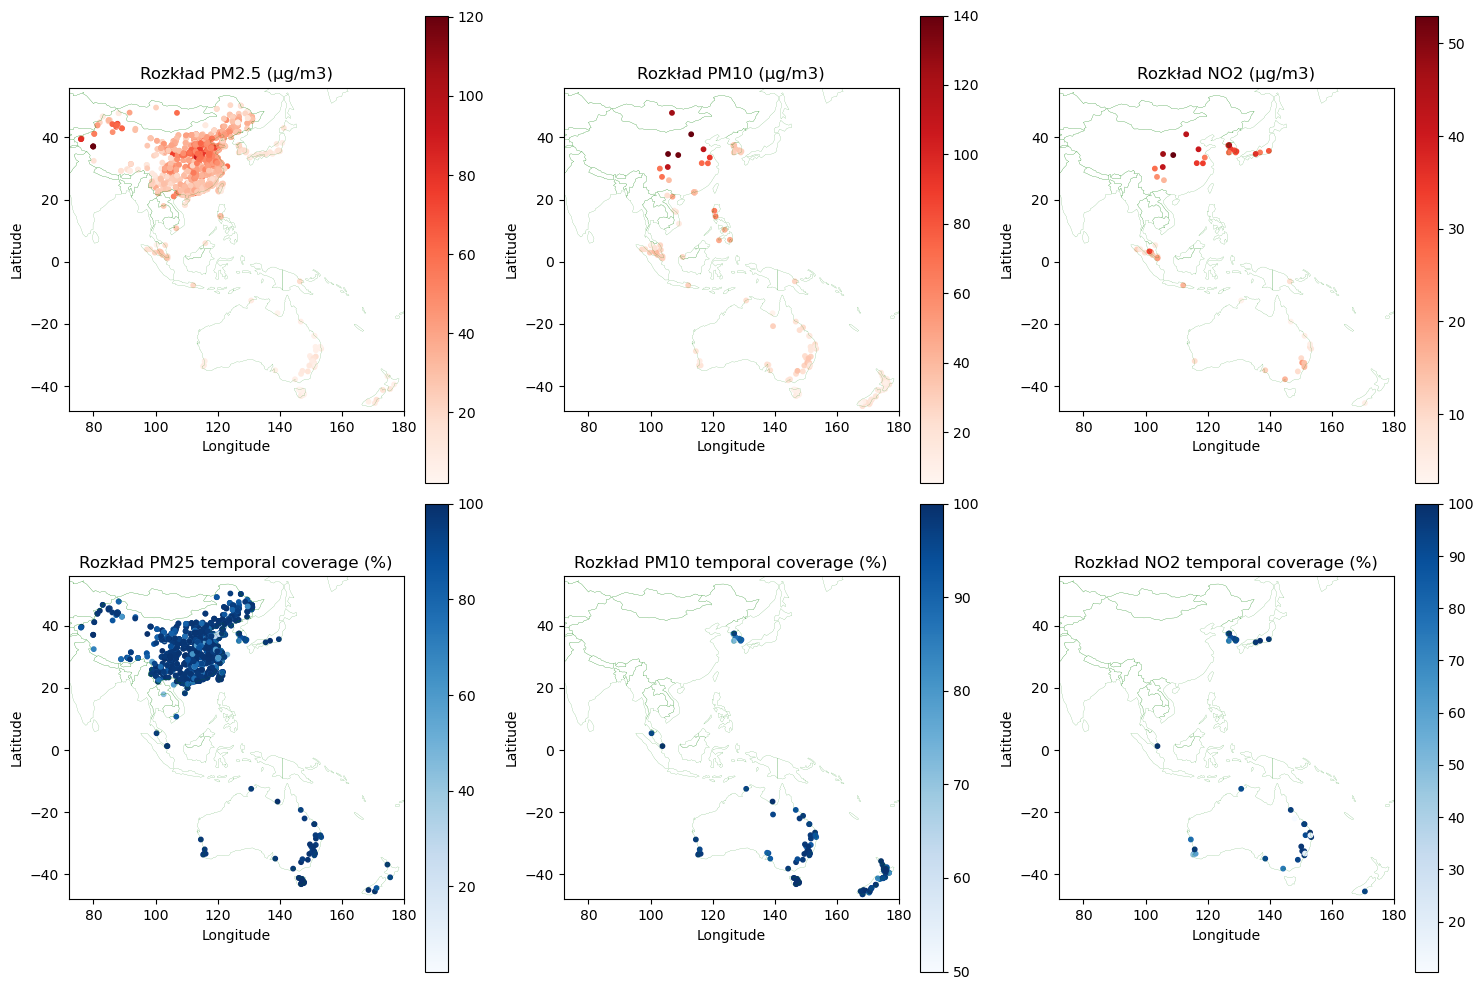

In [89]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"), engine="pyogrio")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, variable in enumerate(variables):
    ax = axes[i]
    ax.set_xlim([72, 180])
    ax.set_ylim([-48, 56])
      
    geometry = gpd.points_from_xy(df_coords_wpa['Longitude'], df_coords_wpa['Latitude'])
    
    gdf = gpd.GeoDataFrame(df_coords_wpa, geometry=geometry)
    
    cmap = 'Reds' if 'coverage' not in variable else 'Blues'
    gdf.plot(ax=ax, column=variable, cmap=cmap, legend=True, markersize=10)
    
    world.boundary.plot(ax=ax, linewidth=0.1, color="green")
    
    ax.set_title(f'Rozkład {variable}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()

W przypadku analizy z podziałem na poszczególne regiony można zaobserwować kilka zależności. Europę charakteryzuje wysoka średnia pokrycia czasowego w każdym z przypadków. Można zauważyć tam też duże różnice w wartościach sum zmiennych. Zauważalne też jest zjawisko, że kraje z większą sumą pokrycia czasowego mają zauważalnie wyższe sumy odnotowanych wartości zanieczyszczeń. Najmniej danych dostarcza region Afryki, gdzie wyraźnie na tle innych wyróżnia się RPA pod względem zanieczyszczeń, a także pokrycia czasowego (w wielu aspektach sumy zmiennych przerastają tam inne kraje wielokrotnie). Ma on przez to również niską średnią pokrycia czasowego. W przypadku regionu zachodniopacyficznego można zaobserwować niewielką ilość danych dotyczących PM10 oraz NO2 w Chinach w ostatnich latach.

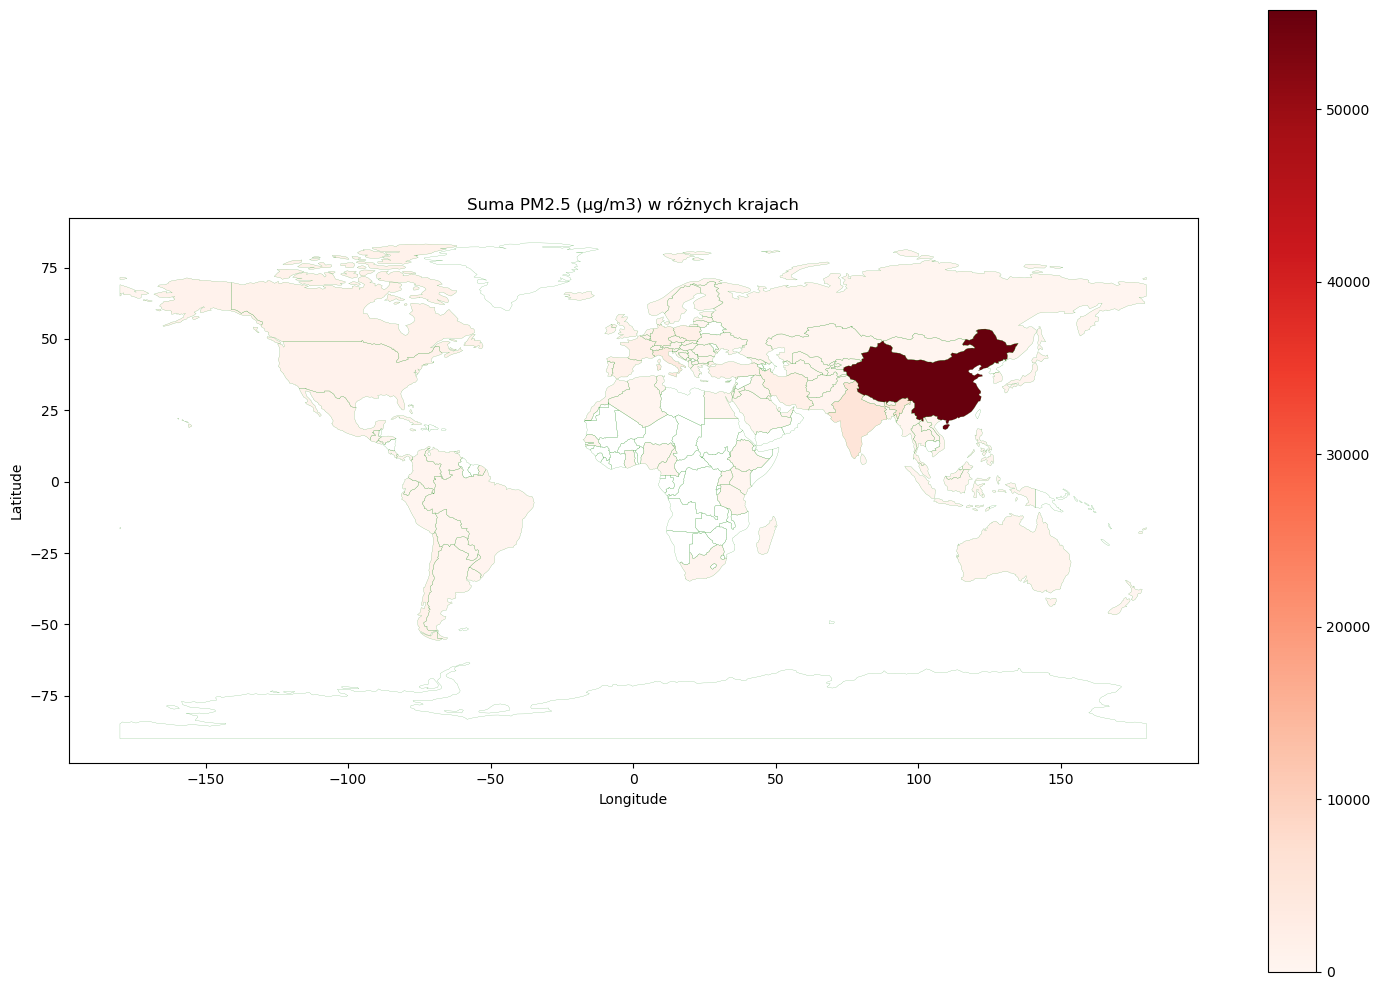

In [90]:
df_grouped = df_coords.groupby('ISO3').sum().reset_index()

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"), engine="pyogrio")
world_merged = world.merge(df_grouped, how='left', left_on='iso_a3', right_on='ISO3')

fig, ax = plt.subplots(figsize=(15, 10))

world_merged.boundary.plot(ax=ax, linewidth=0.1, color="green")

world_merged.plot(column='PM2.5 (μg/m3)', cmap='Reds', legend=True, ax=ax)

ax.set_title('Suma PM2.5 (μg/m3) w różnych krajach')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

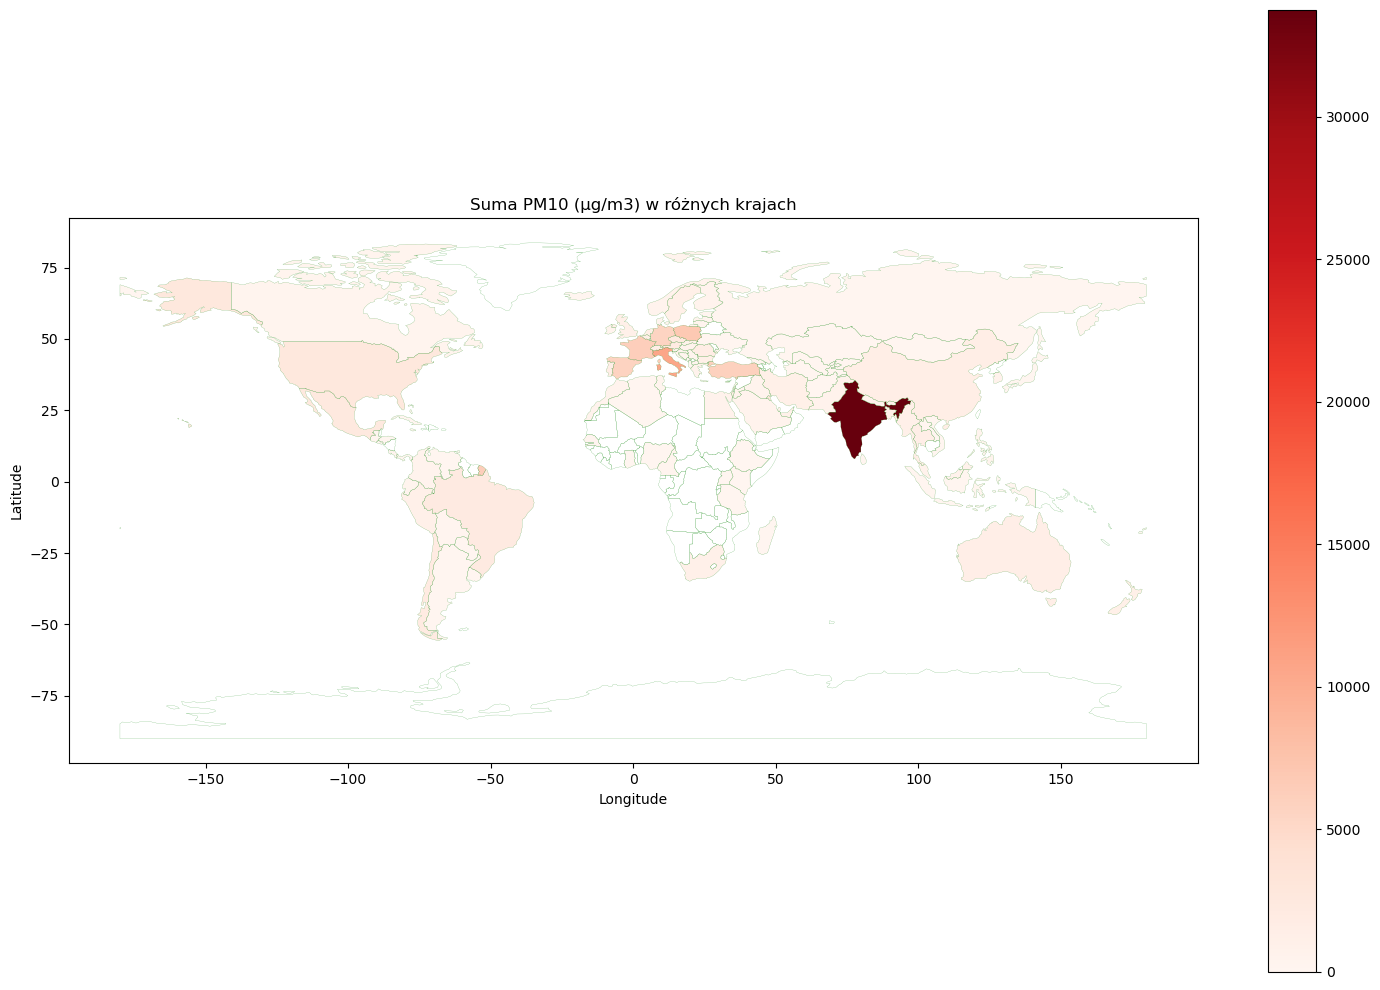

In [91]:
df_grouped = df_coords.groupby('ISO3').sum().reset_index()

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"), engine="pyogrio")
world_merged = world.merge(df_grouped, how='left', left_on='iso_a3', right_on='ISO3')

fig, ax = plt.subplots(figsize=(15, 10))

world_merged.boundary.plot(ax=ax, linewidth=0.1, color="green")

world_merged.plot(column='PM10 (μg/m3)', cmap='Reds', legend=True, ax=ax)

ax.set_title('Suma PM10 (μg/m3) w różnych krajach')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

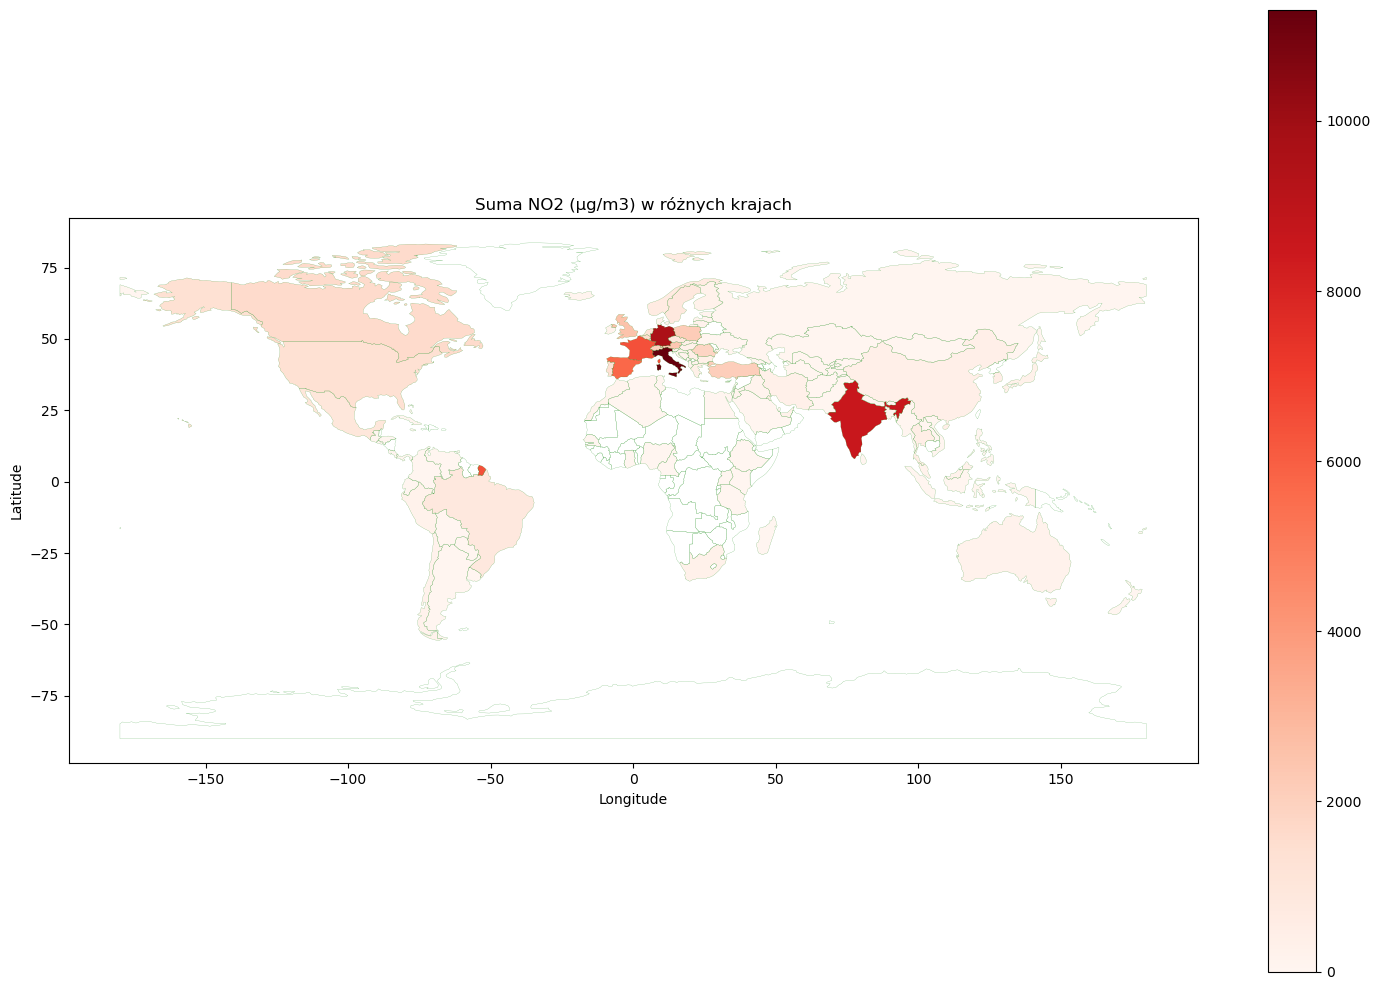

In [92]:
df_grouped = df_coords.groupby('ISO3').sum().reset_index()

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"), engine="pyogrio")
world_merged = world.merge(df_grouped, how='left', left_on='iso_a3', right_on='ISO3')

fig, ax = plt.subplots(figsize=(15, 10))

world_merged.boundary.plot(ax=ax, linewidth=0.1, color="green")

world_merged.plot(column='NO2 (μg/m3)', cmap='Reds', legend=True, ax=ax)

ax.set_title('Suma NO2 (μg/m3) w różnych krajach')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

Dane te są silnie wybrakowane. Można jednak zaobserwować, że w przypadku krajów bardziej rozwiniętych poszczególne kolumny przyjmują wartości w większej liczbie rekordów. Można zauważyć, że największe sumy zanieczyszczeń dla poszczególnych regionów występują w regionach, gdzie zachodzi największe pokrycie czasowe (Europa), może to być spowodowane tym, że kraje bardziej rozwinięte prowadzą dokładniejszy rejestr emitowanych zanieczyszczeń (co potwierdzają ubogie wyniki w Afryce). Z dalszych wykresów da się również zauważyć, że kraje rozwijające się (Indie, Chiny) produkują najwięcej zanieczyszczeń typu PM 2.5 oraz PM 10, a kraje europejskie NO2.

In [93]:
df_years = pd.read_excel('C:/Users/Igor/Desktop/ML/Projekt_1/who_aap_2021_v9_11august2022.xlsx', sheet_name = 'AAP_2022_city_v9')

df = pd.merge(df_years, df_coords[['Latitude', 'Longitude', 'City or Locality']], on='City or Locality')
len(df)

itables.show(df, show_index=False)

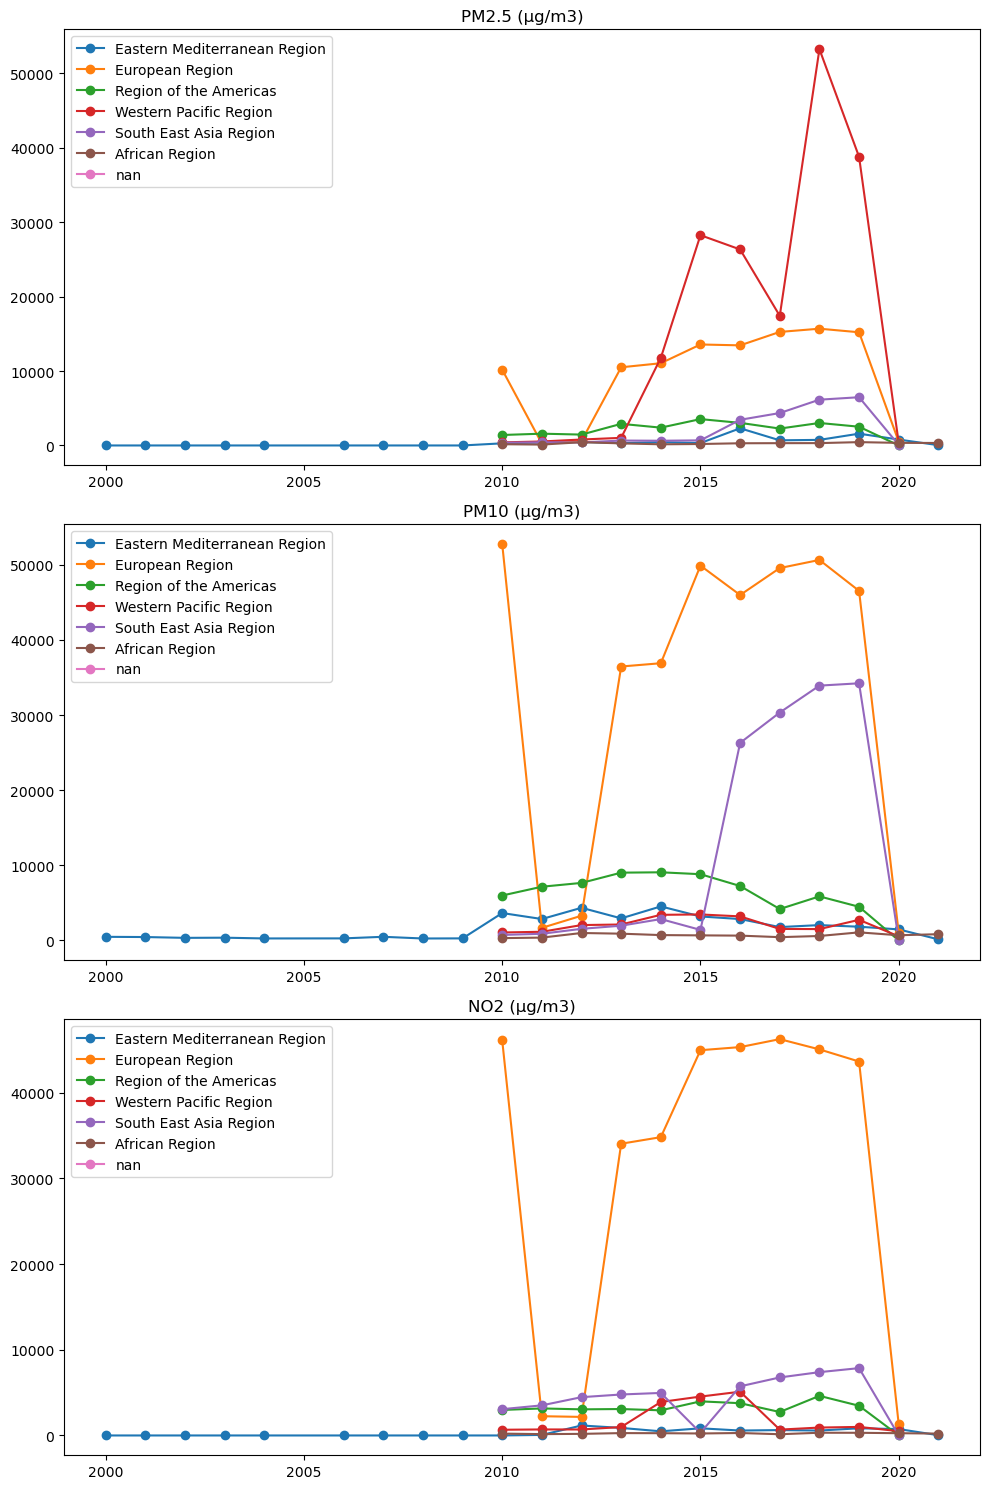

In [100]:
variables = ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']
df_p = df[df["Measurement Year"] >= 0]
df_p = df_p[df_p["Measurement Year"] <= 2050]
df_p = df_p.groupby(["WHO Region", "Measurement Year"]).sum().reset_index()
reg_uni = df['WHO Region'].unique()
reg_uni

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
for ax, var in zip(axes, variables):
    for reg in reg_uni:
        df_reg = df_p[df_p["WHO Region"] == reg]
        ax.plot(df_reg["Measurement Year"], df_reg[var], marker='o', label = reg) 
    ax.set_title(var)
    ax.legend()
plt.tight_layout()
plt.show()

Na powyższych wykresach widać małą ilość danych do roku 2010 i po roku 2019. Z tego względu zdecydowano się ograniczyć do okresu od roku 2010 do 2019.

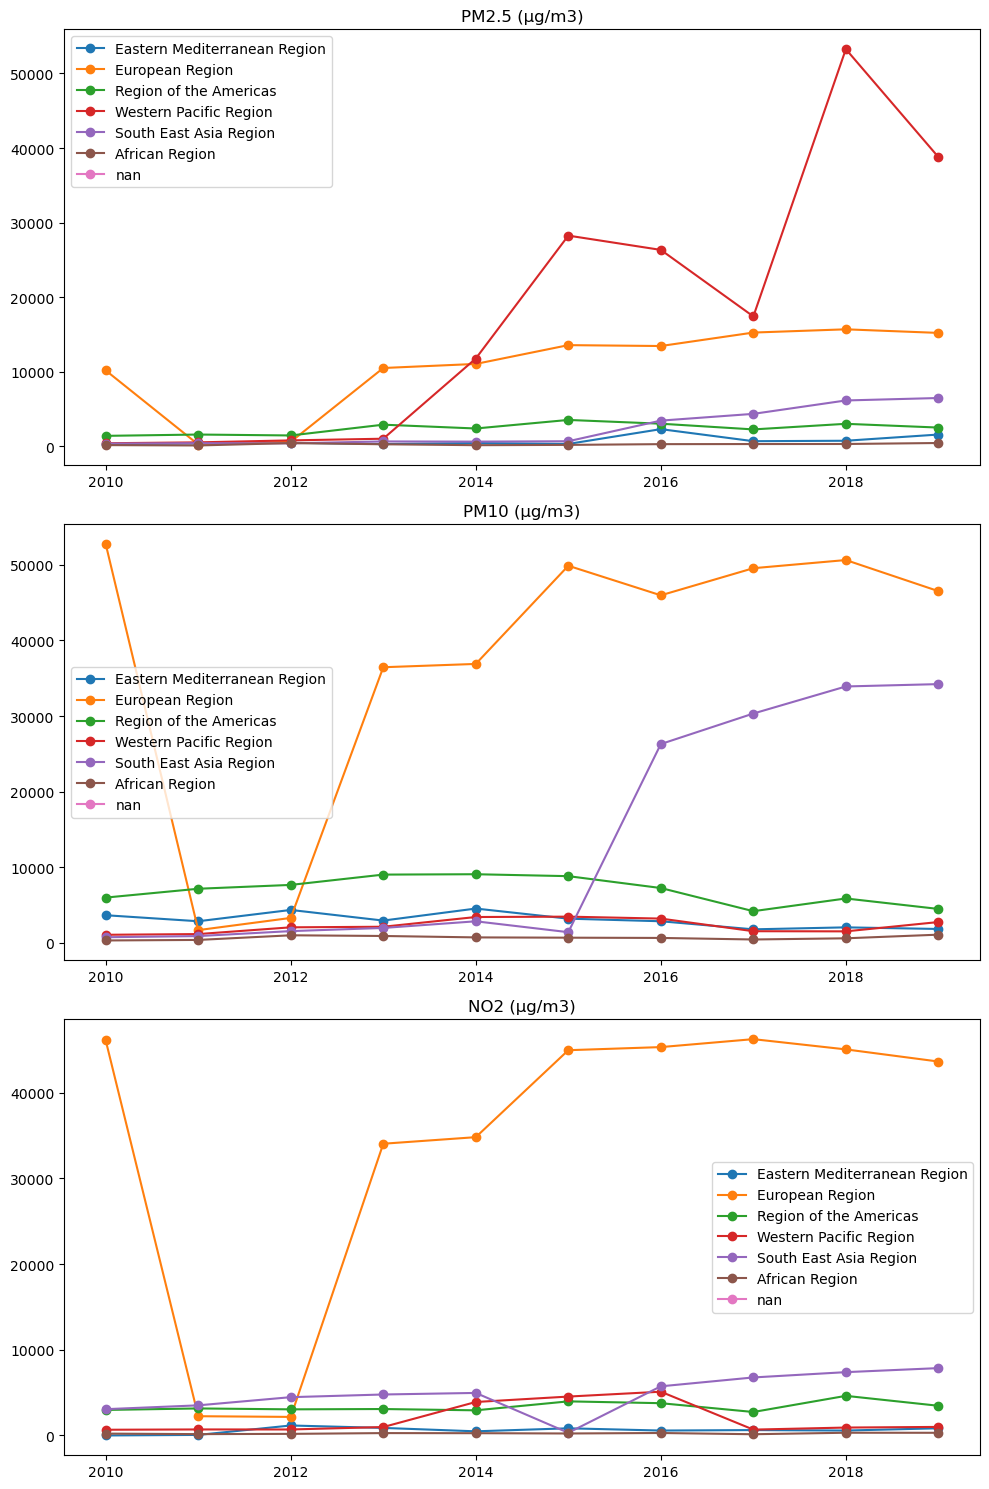

In [101]:
variables = ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']
df_p = df[df["Measurement Year"] >= 2010]
df_p = df_p[df_p["Measurement Year"] <= 2019]
df_p = df_p.groupby(["WHO Region", "Measurement Year"]).sum().reset_index()
reg_uni = df['WHO Region'].unique()
reg_uni

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
for ax, var in zip(axes, variables):
    for reg in reg_uni:
        df_reg = df_p[df_p["WHO Region"] == reg]
        ax.plot(df_reg["Measurement Year"], df_reg[var], marker='o', label = reg) 
    ax.set_title(var)
    ax.legend()
plt.tight_layout()
plt.show()

Na powyższych wykresach można zauważyć, że wartości PM2.5 silnie rosną w tym okresie dla regionu Zachodniego Pacyfiku. Wartości Reszty zmiennych dla Europy są wysokie i pod koniec okresu powoli spadają.

In [110]:
df_m = df[df["Measurement Year"] >= 2010]
df_m = df_m[df_m["Measurement Year"] <= 2019]
df_m = df_m.groupby("ISO3").sum().reset_index()


for var in variables:   
    fig = px.choropleth(df_m, locations="ISO3",
                        color=var, # lifeExp is a column of gapminder
                        hover_name="ISO3", # column to add to hover information
                        color_continuous_scale=px.colors.sequential.Plasma,
                        title = f"Suma wartości {var} dla poszczególnych krajów w latach 2010 - 2019")
    fig.show()

Powyższe mapy przedstawiają sumy wartości PM2.5, PM10 oraz NO2 dla poszczególnych krajów we wskazanym okresie. Można zauważyć wyraźnie najwyższą sumę PM2.5 dla Chin, ale także wysokie wskazania pozostałych zanieczyszczeń na terenie Indii, Europy oraz Stanów Zjednoczonych.

In [103]:
df.isna().mean()

WHO Region                                0.000031
ISO3                                      0.000000
WHO Country Name                          0.000000
City or Locality                          0.000000
Measurement Year                          0.000000
PM2.5 (μg/m3)                             0.532540
PM10 (μg/m3)                              0.344258
NO2 (μg/m3)                               0.310366
PM25 temporal coverage (%)                0.774005
PM10 temporal coverage (%)                0.832841
NO2 temporal coverage (%)                 0.382125
Reference                                 0.000155
Number and type of monitoring stations    0.727936
Version of the database                   0.000000
Status                                    1.000000
Latitude                                  0.100121
Longitude                                 0.100121
dtype: float64

Powyższe statystyki przedstawiają odsetek braków danych w poszczególnych kolumnach zbioru danych. Można zauważyć, że przyjmują na ogół wysokie wartości dla analizowanych zmiennych. Może to sugerować, że dane mogłyby lepiej sprawdzić się w mniejszej skali (np. dla konkretnego miasta) niż dla całego globu, bądź poszczególnych regionów (z uwagi na duże zróżnicowanie w dokładności prowadzenia pomiarów).